# Signals & Sampling


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import pywt 
from scipy import signal
from obspy.core import UTCDateTime
from obspy.clients.syngine import Client

1. **import matplotlib.pyplot as plt**  
    Digunakan untuk menampilkan grafik atau visualisasi data, seperti grafik sinyal.

2. **import numpy as np**  
    Digunakan untuk mengolah angka dan array, seperti membuat data atau melakukan perhitungan matematika.

3. **import neurokit2 as nk**  
    Digunakan untuk menganalisis sinyal fisiologis seperti detak jantung (EKG), pernapasan, dan lainnya.

4. **import pywt**  
    Digunakan untuk melakukan analisis sinyal menggunakan metode wavelet, yang berguna untuk mendeteksi pola dalam waktu dan frekuensi.

5. **from scipy import signal**  
    Digunakan untuk memfilter dan memproses sinyal digital, seperti membuat filter atau mendeteksi puncak.

6. **from obspy.core import UTCDateTime**  
    Digunakan untuk mengatur dan menangani waktu dalam format UTC, sering digunakan dalam analisis data gempa.

7. **from obspy.clients.syngine import Client**  
    Digunakan untuk mengambil data sinyal gempa dari server Syngine milik USGS.



In [13]:
t = np.linspace(0, 10, 1000, endpoint=False)

sine_wave = np.sin(2 * np.pi * 2 * t)
square_wave = signal.square(2 * np.pi * 2 * t)
sawtooth_wave = signal.sawtooth(2 * np.pi * 2 * t)
triangle_wave = signal.sawtooth(2 * np.pi * 2 * t, 0.5)

Kode ini digunakan untuk membuat beberapa jenis gelombang (sinyal) dengan menggunakan fungsi dari `numpy` dan `scipy.signal`. Berikut penjelasan secara umum:

1. **`t = np.linspace(0, 10, 1000, endpoint=False)`**  
    Membuat array `t` yang berisi 1000 titik data yang terdistribusi secara merata dari 0 hingga 10 (tidak termasuk 10). Array ini digunakan sebagai sumbu waktu.

2. **`sine_wave = np.sin(2 * np.pi * 2 * t)`**  
    Membuat gelombang sinusoidal dengan frekuensi 2 Hz. Fungsi sinus ini menghasilkan gelombang yang halus dan periodik.

3. **`square_wave = signal.square(2 * np.pi * 2 * t)`**  
    Membuat gelombang persegi dengan frekuensi 2 Hz. Gelombang ini memiliki nilai yang bergantian antara tinggi (1) dan rendah (-1).

4. **`sawtooth_wave = signal.sawtooth(2 * np.pi * 2 * t)`**  
    Membuat gelombang gergaji dengan frekuensi 2 Hz. Gelombang ini memiliki pola naik secara linear dan turun tajam.

5. **`triangle_wave = signal.sawtooth(2 * np.pi * 2 * t, 0.5)`**  
    Membuat gelombang segitiga dengan frekuensi 2 Hz. Gelombang ini memiliki pola naik dan turun secara linear dengan kemiringan yang sama.

Kode ini digunakan dalam analisis sinyal atau simulasi untuk menghasilkan berbagai bentuk gelombang.

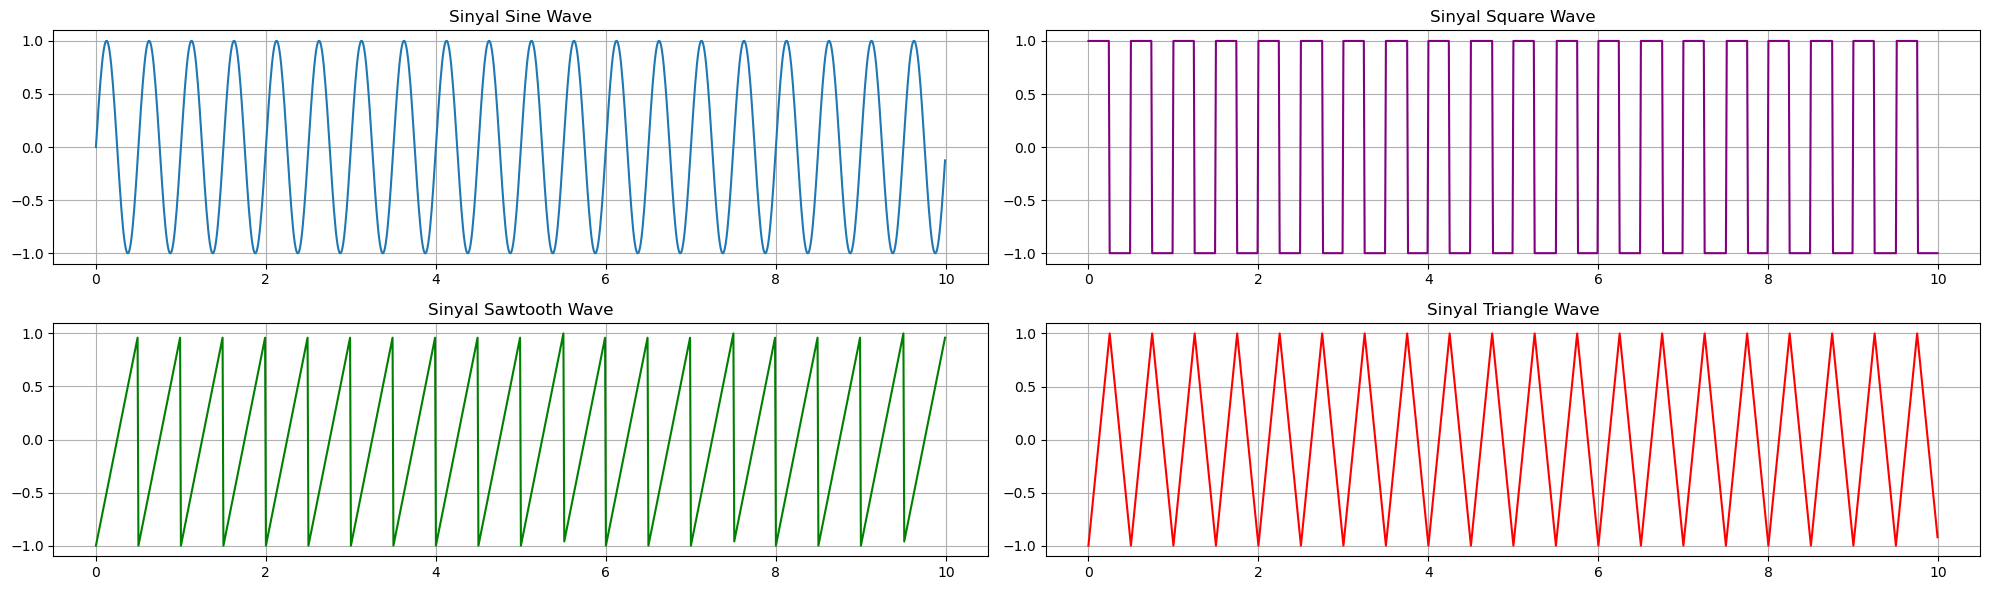

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(20, 6))
axs[0,0].plot(t, sine_wave, label='Sinyal Sine Wave')
axs[0,0].set_title('Sinyal Sine Wave')
axs[0,0].grid(True)

axs[0,1].plot(t, square_wave, label='Sinyal Square Wave', color='purple')
axs[0,1].set_title('Sinyal Square Wave')
axs[0,1].grid(True)

axs[1,0].plot(t, sawtooth_wave, label='Sinyal Sawtooth Wave', color='green')
axs[1,0].set_title('Sinyal Sawtooth Wave')
axs[1,0].grid(True)

axs[1,1].plot(t, triangle_wave, label='Sinyal Triangle Wave', color='red')
axs[1,1].set_title('Sinyal Triangle Wave')
axs[1,1].grid(True)

plt.tight_layout()
plt.show()

Berikut adalah penjelasan visualisasi dari keempat sinyal yang telah dibuat:

1. **Sinyal Sine Wave**  
    - Gelombang sinusoidal ini divisualisasikan pada subplot pertama (kiri atas).  
    - Gelombang ini memiliki pola yang halus dan periodik, dengan nilai yang terus berosilasi antara -1 dan 1.  
    - Grafik ini menunjukkan bentuk gelombang yang sering digunakan dalam analisis sinyal dan aplikasi matematika.

2. **Sinyal Square Wave**  
    - Gelombang persegi divisualisasikan pada subplot kedua (kanan atas).  
    - Gelombang ini memiliki nilai yang bergantian antara tinggi (1) dan rendah (-1), dengan transisi yang tajam.  
    - Bentuk ini sering digunakan dalam sistem digital dan elektronik.

3. **Sinyal Sawtooth Wave**  
    - Gelombang gergaji divisualisasikan pada subplot ketiga (kiri bawah).  
    - Gelombang ini memiliki pola naik secara linear dan turun tajam dalam satu periode.  
    - Bentuk ini sering digunakan dalam aplikasi seperti pengolahan sinyal dan analisis frekuensi.

4. **Sinyal Triangle Wave**  
    - Gelombang segitiga divisualisasikan pada subplot keempat (kanan bawah).  
    - Gelombang ini memiliki pola naik dan turun secara linear dengan kemiringan yang sama, membentuk pola zig-zag yang simetris.  
    - Gelombang ini sering digunakan dalam simulasi sinyal dan analisis sistem.

Setiap subplot dilengkapi dengan judul, label, dan grid untuk mempermudah interpretasi visual. Keempat sinyal ini memberikan representasi yang berbeda dari bentuk gelombang periodik yang sering digunakan dalam berbagai aplikasi teknik dan sains.

# Signal Real Life
### Sinyal ECG (electrocardiography) - Sinyal Kontraksi Jantung

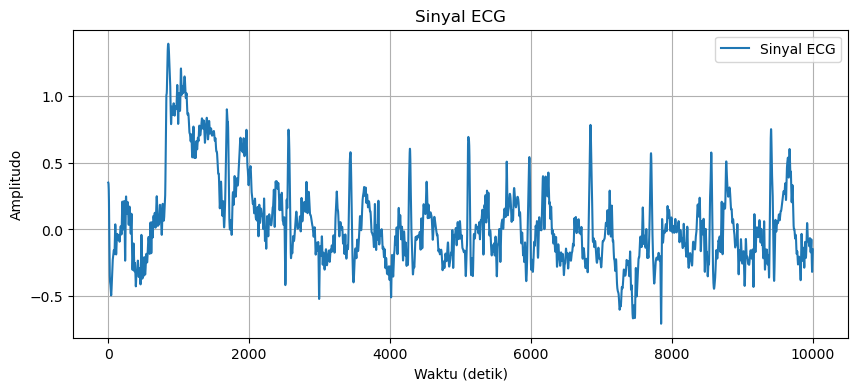

In [16]:
ecg_signal = nk.ecg_simulate(duration=10, sampling_rate=1000, heart_rate=70, noise=0.2, random_state=2025)

# plot the ECG signal
plt.figure(figsize=(10, 4))
plt.plot(ecg_signal, label='Sinyal ECG')
plt.title('Sinyal ECG')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.legend()
plt.show()

### Analisis Sinyal ECG

Sinyal ECG (Electrocardiogram) adalah representasi aktivitas listrik jantung yang dihasilkan selama siklus detak jantung. Berikut adalah analisis berdasarkan kode dan visualisasi sinyal ECG yang telah dibuat:

1. **Durasi dan Sampling Rate**  
    - Sinyal ECG disimulasikan dengan durasi **10 detik** dan **sampling rate 1000 Hz**.  
    - Ini berarti terdapat 1000 sampel data per detik, sehingga sinyal memiliki resolusi tinggi dan detail yang baik.

2. **Frekuensi Detak Jantung**  
    - Frekuensi detak jantung yang disimulasikan adalah **70 bpm (beats per minute)**.  
    - Dalam visualisasi, kita dapat melihat pola periodik yang menunjukkan siklus detak jantung yang berulang.

3. **Kehadiran Noise**  
    - Noise dengan level **0.2** ditambahkan ke sinyal untuk mensimulasikan kondisi nyata, di mana sinyal ECG sering kali tidak sepenuhnya bersih.  
    - Noise ini terlihat sebagai fluktuasi kecil di sekitar sinyal utama.

4. **Komponen Sinyal ECG**  
    - Sinyal ECG terdiri dari beberapa komponen utama: **P wave, QRS complex, dan T wave**.  
    - Dalam visualisasi, kita dapat melihat pola khas ini, di mana:
      - **P wave** menunjukkan depolarisasi atrium.  
      - **QRS complex** adalah puncak tajam yang menunjukkan depolarisasi ventrikel.  
      - **T wave** adalah gelombang yang lebih halus setelah QRS, menunjukkan repolarisasi ventrikel.

5. **Visualisasi**  
    - Grafik menunjukkan sinyal ECG dengan sumbu waktu (dalam detik) pada sumbu x dan amplitudo pada sumbu y.  
    - Pola periodik sinyal menunjukkan aktivitas listrik jantung yang teratur, sesuai dengan detak jantung yang disimulasikan.

6. **Aplikasi**  
    - Sinyal ECG seperti ini digunakan untuk mendiagnosis berbagai kondisi jantung, seperti aritmia, iskemia, atau gangguan konduksi listrik jantung.  
    - Simulasi ini juga berguna untuk pengujian algoritma analisis sinyal ECG tanpa memerlukan data pasien nyata.

Dengan visualisasi ini, kita dapat memahami bagaimana sinyal ECG terlihat dan bagaimana pola-pola tersebut mencerminkan aktivitas listrik jantung.

### Sinyal EEG (electroencephalography) - Sinyal Aktivitas Otak

Sinyal EEG adalah sinyal listrik yang dihasilkan oleh aktivitas otak. Sinyal ini dapat digunakan untuk mendiagnosis berbagai kondisi neurologis, seperti epilepsi, gangguan tidur, dan gangguan mental. Sinyal EEG biasanya direkam menggunakan elektroda yang ditempatkan di kulit kepala.
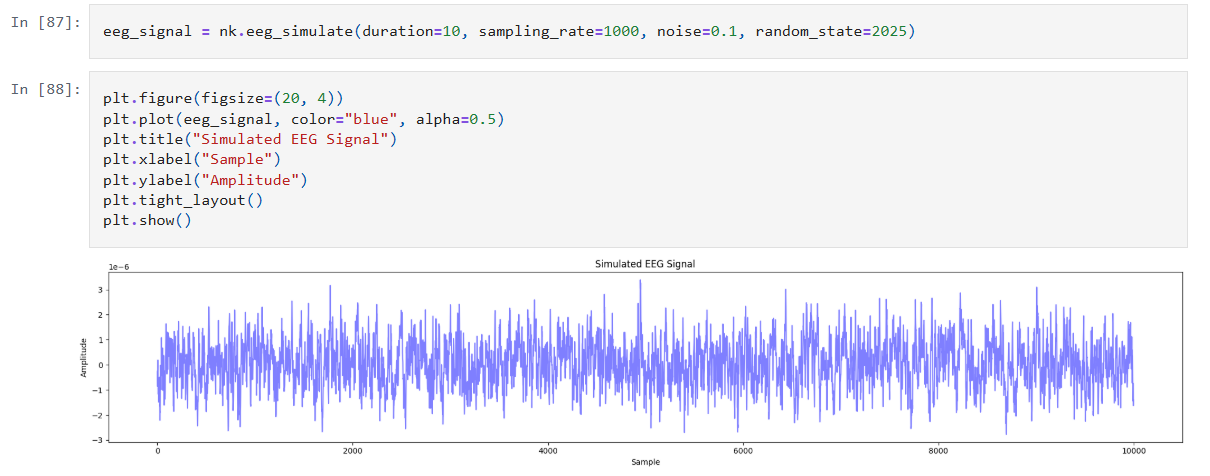

### Sinyal Respirasi (Respiration) 🫁
Sinyal respirasi adalah sinyal yang dihasilkan oleh aktivitas pernapasan. Sinyal ini dapat digunakan untuk mendiagnosis berbagai kondisi pernapasan, seperti asma, penyakit paru obstruktif kronis (PPOK), dan sleep apnea. Sinyal respirasi biasanya direkam menggunakan sensor yang ditempatkan di dada atau perut (respitaroy belt).

In [37]:
resp_signal = nk.rsp_simulate(duration=60, sampling_rate=20, respiratory_rate=20, noise=0.1, random_state=2025)

Kode `resp_signal = nk.rsp_simulate(duration=60, sampling_rate=20, respiratory_rate=20, noise=0.1, random_state=2025)` digunakan untuk mensimulasikan sinyal respirasi (pernapasan) selama 60 detik dengan laju sampling 20 Hz, yang berarti terdapat 20 sampel data per detik. Frekuensi pernapasan disetel pada 20 kali per menit, mencerminkan pola pernapasan normal manusia. Tingkat noise sebesar 0.1 ditambahkan untuk merepresentasikan kondisi nyata, di mana sinyal respirasi sering kali tidak sepenuhnya bersih. Parameter `random_state=2025` memastikan hasil simulasi bersifat deterministik, sehingga menghasilkan sinyal yang sama setiap kali kode dijalankan.

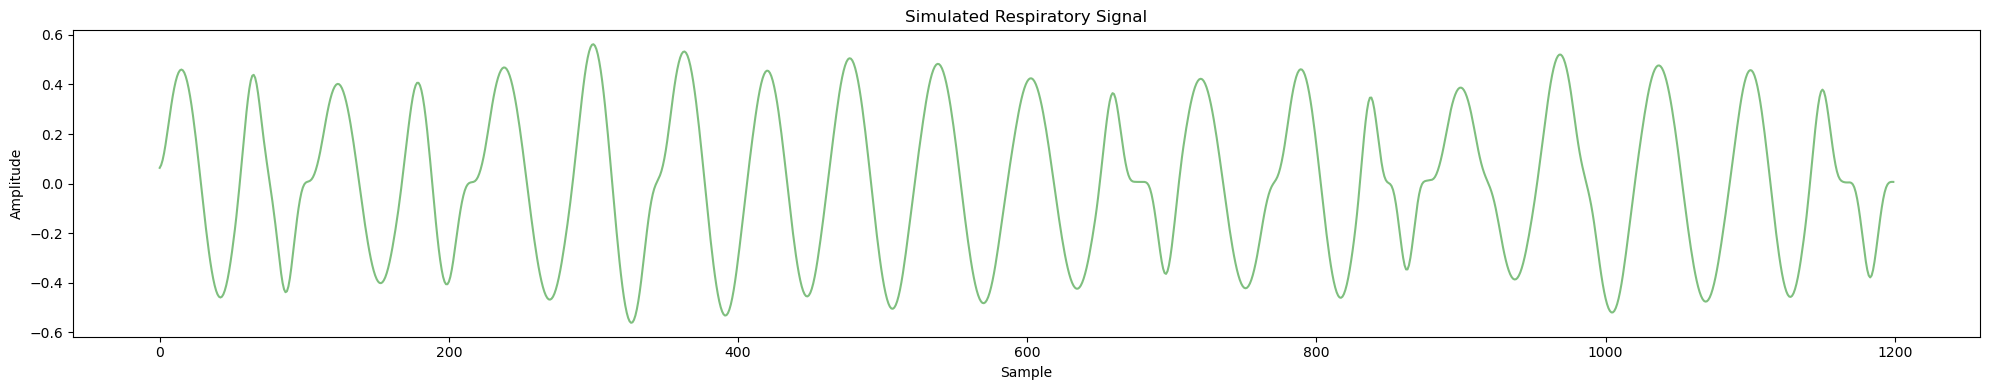

In [38]:
plt.figure(figsize=(20, 4))
plt.plot(resp_signal, color="green", alpha=0.5)
plt.title("Simulated Respiratory Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

### Penjelasan Visualisasi Sinyal Respirasi

1. **Bentuk Sinyal**  
    - Sinyal respirasi yang divisualisasikan menunjukkan pola naik-turun yang berulang secara periodik.  
    - Pola ini mencerminkan siklus pernapasan, yaitu proses inhalasi (menghirup udara) dan ekshalasi (menghembuskan udara).

2. **Sumbu X (Sample)**  
    - Sumbu horizontal (x-axis) menunjukkan jumlah sampel data yang diambil selama durasi simulasi.  
    - Setiap titik pada sumbu ini merepresentasikan waktu tertentu dalam proses pengambilan data.

3. **Sumbu Y (Amplitude)**  
    - Sumbu vertikal (y-axis) menunjukkan amplitudo sinyal, yang mencerminkan intensitas atau kekuatan pernapasan pada waktu tertentu.  
    - Nilai amplitudo yang lebih tinggi menunjukkan fase inhalasi, sedangkan nilai yang lebih rendah menunjukkan fase ekshalasi.

4. **Kehadiran Noise**  
    - Sinyal ini memiliki sedikit noise (gangguan kecil) yang ditambahkan untuk mensimulasikan kondisi nyata.  
    - Noise ini terlihat sebagai fluktuasi kecil di sekitar pola utama sinyal.

5. **Frekuensi Pernapasan**  
    - Frekuensi pernapasan yang disimulasikan adalah **20 kali per menit**, yang mencerminkan kecepatan pernapasan normal pada manusia.  
    - Pola periodik sinyal ini sesuai dengan frekuensi tersebut.

6. **Aplikasi**  
    - Sinyal respirasi seperti ini digunakan untuk memantau pola pernapasan seseorang, misalnya dalam diagnosis gangguan pernapasan seperti sleep apnea atau asma.  
    - Visualisasi ini membantu memahami bagaimana pernapasan seseorang berlangsung dalam periode waktu tertentu.

Dengan visualisasi ini, kita dapat melihat bagaimana pola pernapasan direpresentasikan dalam bentuk sinyal, yang dapat digunakan untuk analisis lebih lanjut.

### Sinyal EMG (Electromyogram) 💪
Sinyal EMG adalah sinyal listrik yang dihasilkan oleh aktivitas otot. Sinyal ini dapat digunakan untuk mendiagnosis berbagai kondisi otot, seperti distrofi otot, neuropati, dan cedera saraf. Sinyal EMG biasanya direkam menggunakan elektroda yang ditempatkan di kulit di atas otot yang akan dianalisis.

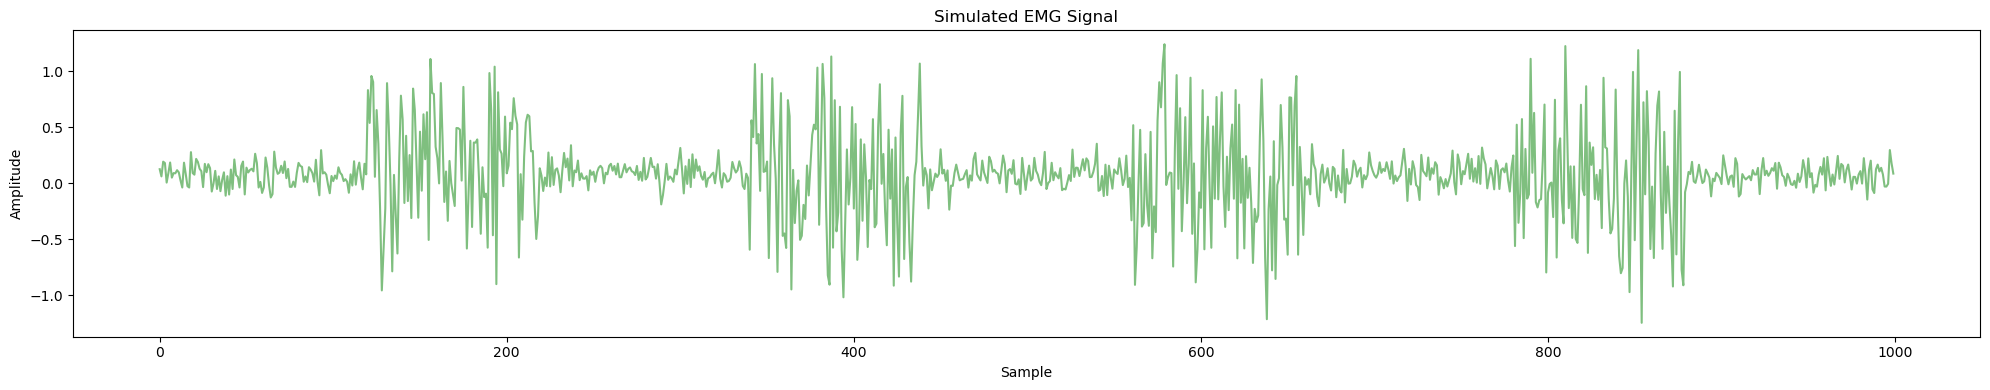

In [49]:
emg_singal = nk.emg_simulate(duration=10, sampling_rate=100, noise=0.1, burst_number=4,random_state=2025)
# Menampilkan plot sinyal EMG
plt.figure(figsize=(20, 4))
plt.plot(emg_singal, color="green", alpha=0.5)
plt.title("Simulated EMG Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

### Analisis Visualisasi Sinyal EMG

1. **Bentuk Sinyal**  
    - Sinyal EMG menunjukkan pola aktivitas otot yang tidak teratur dan bersifat acak.  
    - Pola ini mencerminkan kontraksi otot yang terjadi selama periode waktu tertentu.

2. **Sumbu X (Sample)**  
    - Sumbu horizontal (x-axis) menunjukkan jumlah sampel data yang diambil selama durasi simulasi.  
    - Setiap titik pada sumbu ini merepresentasikan waktu tertentu dalam proses pengambilan data.

3. **Sumbu Y (Amplitude)**  
    - Sumbu vertikal (y-axis) menunjukkan amplitudo sinyal, yang mencerminkan intensitas aktivitas listrik otot.  
    - Nilai amplitudo yang lebih tinggi menunjukkan aktivitas otot yang lebih kuat.

4. **Burst Aktivitas**  
    - Sinyal EMG yang disimulasikan memiliki **4 burst aktivitas**, yang terlihat sebagai peningkatan amplitudo pada interval tertentu.  
    - Burst ini mencerminkan periode kontraksi otot yang lebih intens.

5. **Kehadiran Noise**  
    - Noise dengan tingkat **0.1** ditambahkan untuk mensimulasikan kondisi nyata, di mana sinyal EMG sering kali tidak sepenuhnya bersih.  
    - Noise ini terlihat sebagai fluktuasi kecil di sekitar pola utama sinyal.

6. **Aplikasi**  
    - Sinyal EMG digunakan untuk menganalisis aktivitas otot, seperti mengukur kekuatan kontraksi otot atau mendeteksi gangguan otot.  
    - Visualisasi ini membantu memahami bagaimana otot bekerja selama periode waktu tertentu.

Dengan visualisasi ini, kita dapat melihat pola aktivitas otot yang direpresentasikan dalam bentuk sinyal EMG, yang dapat digunakan untuk analisis lebih lanjut, seperti mendeteksi gangguan neuromuskular atau mengevaluasi performa otot.

### Sinyal Lingkungan 🌍 (Seismic / Gempa Bumi)
#### Sinyal Seismik (Gempa Bumi) 🌋
Sinyal seismik adalah sinyal yang dihasilkan oleh aktivitas gempa bumi. Sinyal ini dapat digunakan untuk mendiagnosis berbagai kondisi geologi, seperti gempa bumi, letusan gunung berapi, dan pergeseran tanah. Sinyal seismik biasanya direkam menggunakan sensor yang ditempatkan di permukaan tanah atau di dalam tanah (seismometer).

In [51]:
client = Client()
origin_time = UTCDateTime("2023-10-01T00:00:00")
# seismogram = client.get_waveforms(model="ak135f_2s", sourcelatitude=-7.8007839033133575, sourcelongitude=110.37098235071159, sourcedepthinmeters=10000, receiverlatitude=35.6895, receiverlongitude=139.6917, components="ZNE", units="displacement") # Jogjakarta

seismogram = client.get_waveforms(model="ak135f_2s", sourcelatitude=-5.440599180710982, sourcelongitude=105.27711959083427, sourcedepthinmeters=10000, receiverlatitude=35.6895, receiverlongitude=139.6917, components="ZNE", units="displacement") # Lampung

Kode ini menggunakan modul `obspy` untuk mengambil data sinyal seismik dari model seismologi global "ak135f_2s" melalui klien Syngine. Variabel `origin_time` menentukan waktu awal kejadian gempa dalam format UTC. Parameter seperti `sourcelatitude`, `sourcelongitude`, dan `sourcedepthinmeters` mendefinisikan lokasi sumber gempa (dalam contoh ini, Lampung), sedangkan `receiverlatitude` dan `receiverlongitude` menentukan lokasi penerima sinyal (Tokyo). Komponen sinyal yang diambil adalah "ZNE" (vertikal, utara, timur), dan unitnya adalah perpindahan (`displacement`). Data ini berguna untuk menganalisis propagasi gelombang seismik dari sumber ke penerima.

<Figure size 2000x400 with 0 Axes>

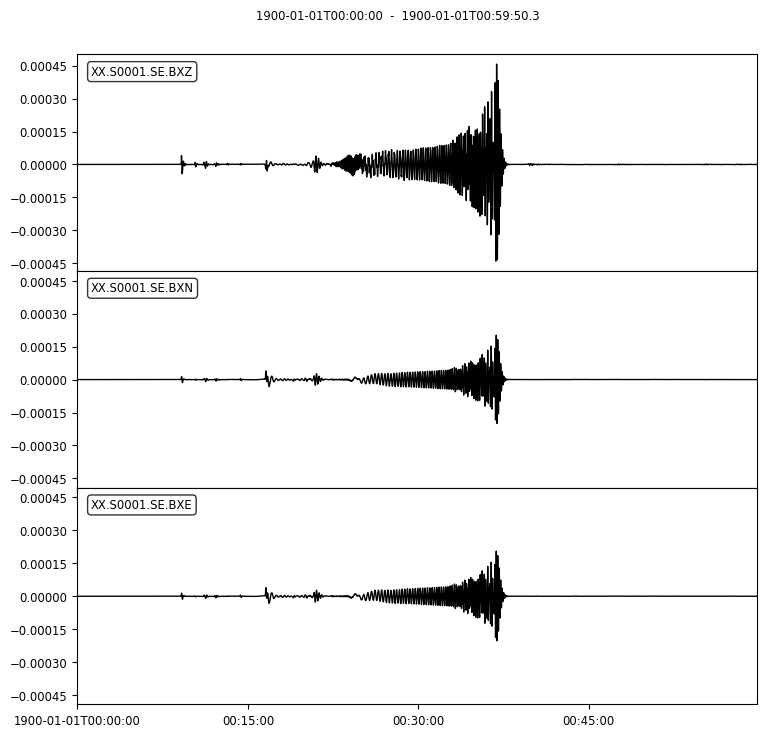

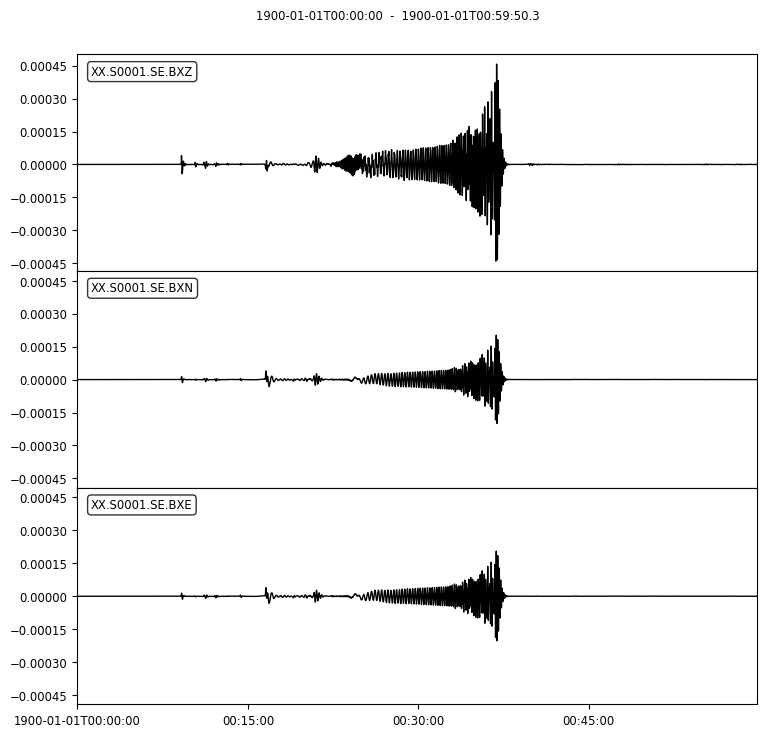

In [53]:
# Menampilkan plot sinyal seismogram
plt.figure(figsize=(20, 4))
seismogram.plot()

### Analisis Visualisasi Sinyal Seismogram

1. **Bentuk Sinyal**  
    - Sinyal seismogram menunjukkan pola gelombang yang kompleks, yang merupakan hasil dari propagasi gelombang seismik melalui berbagai lapisan bumi.  
    - Pola ini mencakup gelombang primer (P-wave), gelombang sekunder (S-wave), dan gelombang permukaan (surface waves), yang masing-masing memiliki karakteristik unik.

2. **Sumbu X (Waktu)**  
    - Sumbu horizontal (x-axis) merepresentasikan waktu dalam detik.  
    - Ini menunjukkan kapan gelombang seismik tiba di lokasi penerima setelah kejadian gempa.

3. **Sumbu Y (Amplitudo)**  
    - Sumbu vertikal (y-axis) menunjukkan amplitudo perpindahan tanah akibat gelombang seismik.  
    - Amplitudo yang lebih besar menunjukkan intensitas getaran yang lebih kuat.

4. **Komponen Sinyal (ZNE)**  
    - Sinyal seismogram biasanya terdiri dari tiga komponen:  
        - **Z (vertikal):** Pergerakan tanah ke atas dan ke bawah.  
        - **N (utara):** Pergerakan tanah ke arah utara.  
        - **E (timur):** Pergerakan tanah ke arah timur.  
    - Analisis ketiga komponen ini membantu menentukan arah dan sumber gelombang seismik.

5. **Kehadiran Noise**  
    - Sinyal seismogram sering kali mengandung noise, yang dapat berasal dari aktivitas manusia, angin, atau sumber lainnya.  
    - Noise ini dapat memengaruhi interpretasi sinyal dan perlu difilter untuk analisis lebih akurat.

6. **Identifikasi Gelombang**  
    - Dalam visualisasi, kita dapat mengidentifikasi berbagai jenis gelombang:  
        - **P-wave:** Gelombang pertama yang tiba, dengan kecepatan tinggi dan amplitudo kecil.  
        - **S-wave:** Gelombang kedua yang tiba, dengan kecepatan lebih lambat dan amplitudo lebih besar.  
        - **Surface waves:** Gelombang terakhir yang tiba, dengan amplitudo terbesar dan durasi lebih panjang.

7. **Aplikasi**  
    - Sinyal seismogram digunakan untuk:  
        - Menentukan lokasi dan kekuatan gempa bumi.  
        - Menganalisis struktur internal bumi, seperti lapisan mantel dan inti.  
        - Memantau aktivitas vulkanik dan pergerakan tanah.

8. **Interpretasi**  
    - Dengan menganalisis sinyal seismogram, kita dapat memahami karakteristik gempa, seperti magnitudo, kedalaman, dan lokasi episentrum.  
    - Pola gelombang juga memberikan informasi tentang jenis batuan yang dilalui oleh gelombang seismik.

Visualisasi sinyal seismogram ini memberikan wawasan penting tentang dinamika gempa bumi dan propagasi gelombang seismik, yang sangat berguna dalam mitigasi bencana dan penelitian geofisika.

### Sinyal Perubahan Suhu 🌡️
Sinyal perubahan suhu adalah sinyal yang dihasilkan oleh perubahan suhu lingkungan. Sinyal ini dapat digunakan untuk mendiagnosis berbagai kondisi lingkungan, seperti perubahan iklim, cuaca ekstrem, dan polusi udara. Sinyal perubahan suhu biasanya direkam menggunakan sensor suhu yang ditempatkan di lingkungan sekitar.

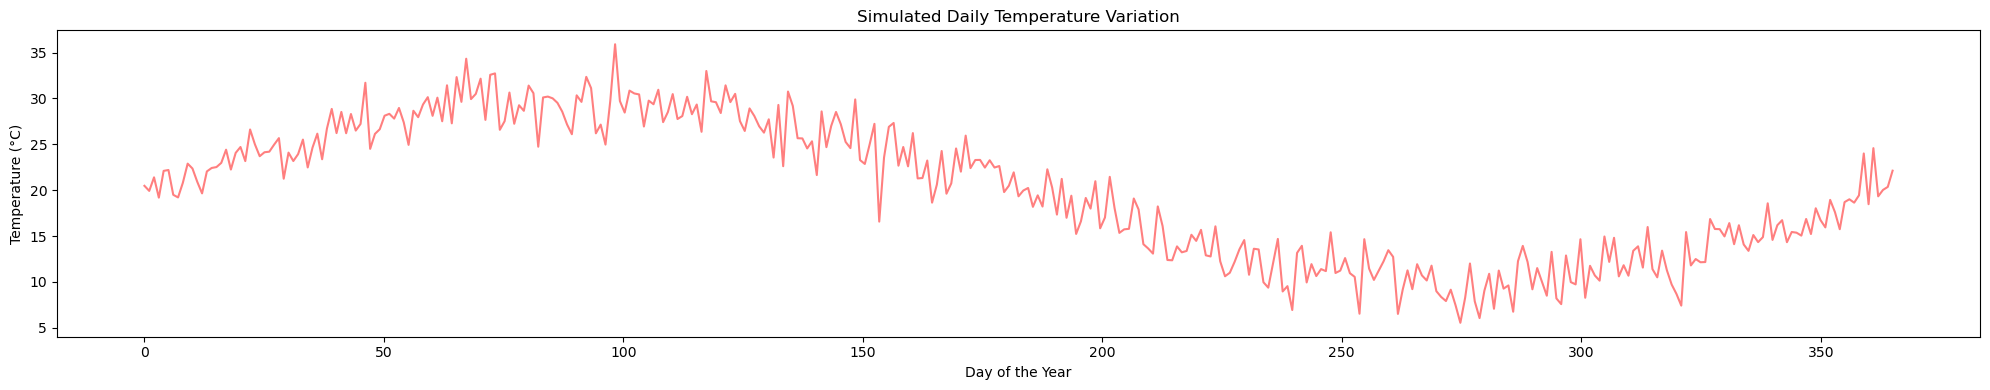

In [54]:
t = np.linspace(0, 365, 365) # Data selama 1 tahun

# Mensimulasikan variasi suhu harian dengan noise 
temperature = 20 + 10 * np.sin(2 * np.pi * t / 365) + 2 * np.random.normal(size=t.shape)

# Menvisualisasi data suhu
plt.figure(figsize=(20, 4))
plt.plot(t, temperature, color="red", alpha=0.5)
plt.title("Simulated Daily Temperature Variation")
plt.xlabel("Day of the Year")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

### Analisis Sinyal Perubahan Suhu 🌡️

1. **Bentuk Sinyal**  
    - Sinyal menunjukkan pola naik-turun suhu harian selama satu tahun.  
    - Pola ini mencerminkan perubahan suhu musiman, seperti suhu lebih tinggi di musim panas dan lebih rendah di musim dingin.

2. **Sumbu X (Hari dalam Setahun)**  
    - Sumbu horizontal menunjukkan hari dalam setahun (1 hingga 365).  
    - Setiap titik merepresentasikan suhu pada hari tertentu.

3. **Sumbu Y (Suhu dalam °C)**  
    - Sumbu vertikal menunjukkan suhu dalam derajat Celsius.  
    - Nilai suhu bervariasi sekitar rata-rata 20°C dengan fluktuasi karena noise.

4. **Kehadiran Noise**  
    - Noise kecil ditambahkan untuk mensimulasikan kondisi nyata, seperti perubahan suhu mendadak akibat cuaca.

5. **Aplikasi**  
    - Sinyal ini dapat digunakan untuk mempelajari pola iklim, memprediksi cuaca, atau menganalisis dampak perubahan iklim.

Visualisasi ini membantu memahami bagaimana suhu berubah sepanjang tahun dengan pola musiman yang jelas.


### Sinyal Komunikasi 📡
#### Sinyal Radio AM 📻
Sinyal radio AM bekerja dengan cara mengubah amplitudo dari sinyal pembawa sesuai dengan informasi yang ingin dikirimkan. Sinyal ini terdiri dari dua komponen utama: pembawa (carrier) dan modulasi. Pembawa adalah sinyal sinusoidal dengan frekuensi tetap, sedangkan modulasi adalah informasi yang ingin kita kirimkan. Dalam contoh ini, kita akan membuat sinyal radio AM sederhana.

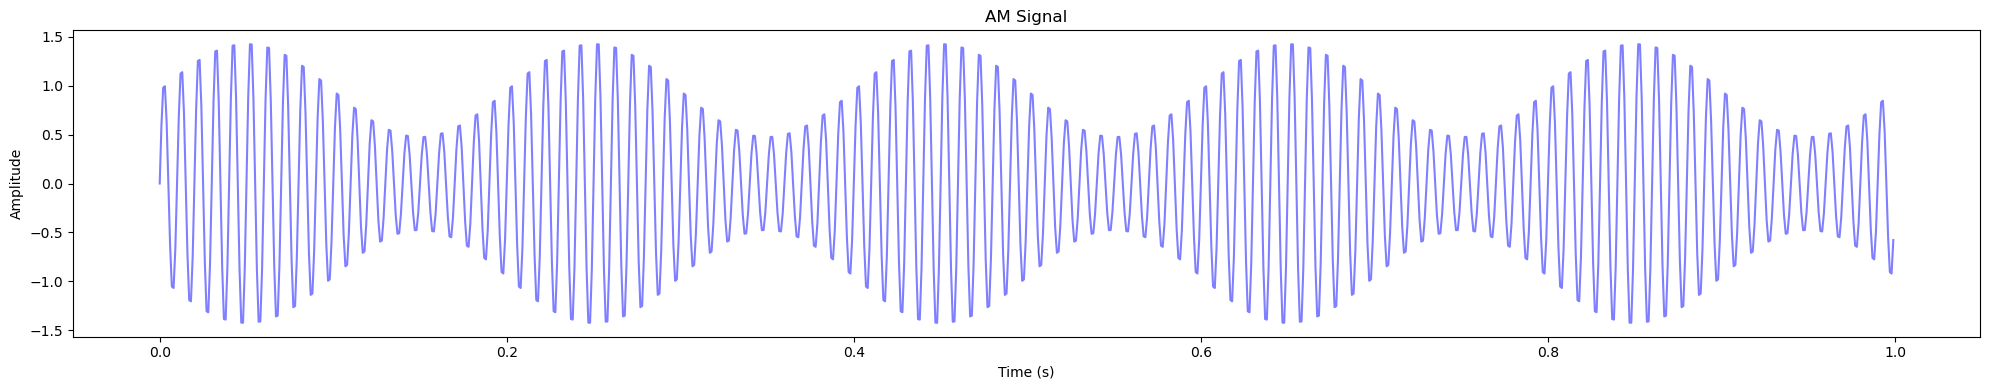

In [55]:
# Menginitialisasi parameter parameter yang digunakan untuk membuat sinyal radio AM
fs = 1000 # Sampling frequency
carrier_frequency = 100 # Carrier frequency 
modulating_frequency = 5 # Modulating frequency

t = np.linspace(0, 1, fs, endpoint=False) # Waktu dari 0 sampai 1 detik
carrier = np.sin(2 * np.pi * carrier_frequency * t) # Sinyal pembawa
modulating_signal = 1 + 0.5 * np.sin(2 * np.pi * modulating_frequency * t) # Sinyal modulasi

# Membuat sinyal AM 
am_signal = carrier * modulating_signal # Sinyal AM

# Menampilkan plot sinyal AM
plt.figure(figsize=(20, 4))
plt.plot(t, am_signal, color="blue", alpha=0.5)
plt.title("AM Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

### Analisis Sinyal AM (Amplitude Modulation) 📡

1. **Apa itu Sinyal AM?**  
    - Sinyal AM adalah sinyal komunikasi yang bekerja dengan cara **mengubah amplitudo** dari sinyal pembawa (carrier) sesuai dengan informasi yang ingin dikirimkan.  
    - Dalam contoh ini, sinyal pembawa adalah gelombang sinusoidal dengan frekuensi tetap, sedangkan sinyal modulasi adalah informasi yang ingin dikirimkan.

2. **Komponen Sinyal AM**  
    - **Sinyal Pembawa (Carrier):**  
      - Gelombang sinusoidal dengan frekuensi tinggi (100 Hz).  
      - Berfungsi sebagai media untuk membawa informasi.  
    - **Sinyal Modulasi (Modulating Signal):**  
      - Gelombang sinusoidal dengan frekuensi lebih rendah (5 Hz).  
      - Berisi informasi yang ingin dikirimkan.  
    - **Sinyal AM:**  
      - Hasil dari perkalian sinyal pembawa dengan sinyal modulasi.  
      - Amplitudo sinyal pembawa berubah sesuai dengan sinyal modulasi.

3. **Bentuk Sinyal AM**  
    - Pada grafik, terlihat bahwa amplitudo sinyal AM naik dan turun mengikuti pola sinyal modulasi.  
    - Pola ini mencerminkan informasi yang dikodekan dalam sinyal.

4. **Sumbu Grafik**  
    - **Sumbu X (Time):**  
      - Menunjukkan waktu dalam detik.  
      - Grafik menunjukkan bagaimana sinyal AM berubah seiring waktu.  
    - **Sumbu Y (Amplitude):**  
      - Menunjukkan amplitudo sinyal.  
      - Amplitudo sinyal AM bervariasi sesuai dengan sinyal modulasi.

5. **Aplikasi Sinyal AM**  
    - Digunakan dalam komunikasi radio, seperti siaran radio AM.  
    - Sinyal AM memungkinkan pengiriman informasi suara atau data melalui jarak jauh.

6. **Kesimpulan**  
    - Sinyal AM adalah kombinasi dari sinyal pembawa dan sinyal modulasi.  
    - Visualisasi ini membantu memahami bagaimana informasi dikodekan dalam amplitudo sinyal pembawa.  
    - Dengan mempelajari sinyal AM, kita dapat memahami dasar-dasar komunikasi analog.

#### Sinyal Radio FM 📻
Berbeda dengan sinyal radio AM yang mengubah amplitudo dari sinyal pembawa, sinyal radio FM (Frequency Modulation) bekerja dengan cara mengubah frekuensi dari sinyal pembawa sesuai dengan informasi yang ingin dikirimkan. Sinyal ini terdiri dari dua komponen utama: pembawa (carrier) dan modulasi. Pembawa adalah sinyal sinusoidal dengan frekuensi tetap, sedangkan modulasi adalah informasi yang ingin kita kirimkan. Dalam contoh ini, kita akan membuat sinyal radio FM sederhana.

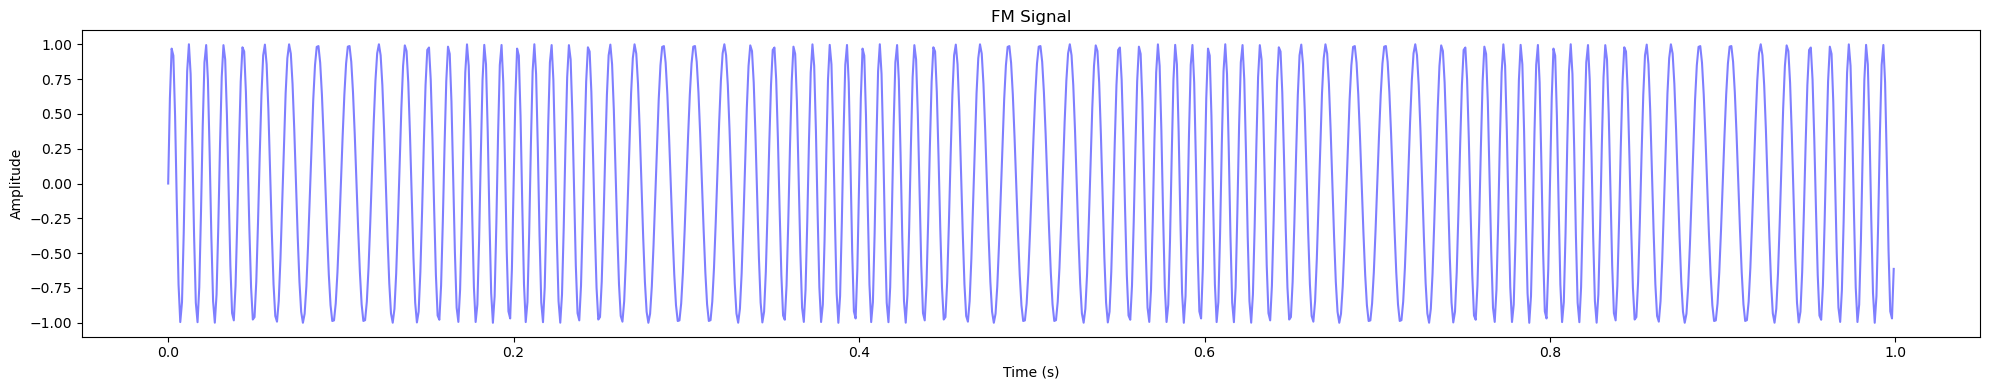

In [60]:
#Menginitialisasi parameter parameter yang digunakan untuk membuat sinyal radio FM
fs = 1000 # Sampling frequency
carrier_frequency = 80 # Carrier frequency
modulating_frequency = 5 # Modulating frequency
t = np.linspace(0, 1, fs, endpoint=False) # Waktu dari 0 sampai 1 detik

# Membuat sinyal pembawa
carrier = np.sin(2 * np.pi * carrier_frequency * t) # Sinyal pembawa
# Membuat sinyal modulasi
modulating_signal = np.sin(2 * np.pi * modulating_frequency * t) # Sinyal modulasi
# Membuat sinyal FM
fm_signal = np.sin(2 * np.pi * carrier_frequency * t + 5 * modulating_signal) # Sinyal FM

# Menampilkan plot sinyal FM
plt.figure(figsize=(20, 4))
plt.plot(t, fm_signal, color="blue", alpha=0.5)
plt.title("FM Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

### Analisis Sinyal FM (Frequency Modulation) 📡

1. **Apa itu Sinyal FM?**  
    - Sinyal FM adalah sinyal komunikasi yang bekerja dengan cara **mengubah frekuensi** dari sinyal pembawa (carrier) sesuai dengan informasi yang ingin dikirimkan.  
    - Dalam contoh ini:
      - **Sinyal pembawa** adalah gelombang sinusoidal dengan frekuensi tetap (80 Hz).  
      - **Sinyal modulasi** adalah gelombang sinusoidal dengan frekuensi lebih rendah (5 Hz), yang berisi informasi yang ingin dikirimkan.  

2. **Komponen Sinyal FM**  
    - **Sinyal Pembawa (Carrier):**  
      - Gelombang sinusoidal dengan frekuensi tinggi (80 Hz).  
      - Berfungsi sebagai media untuk membawa informasi.  
    - **Sinyal Modulasi (Modulating Signal):**  
      - Gelombang sinusoidal dengan frekuensi lebih rendah (5 Hz).  
      - Berisi informasi yang ingin dikirimkan.  
    - **Sinyal FM:**  
      - Hasil dari modulasi frekuensi, di mana frekuensi sinyal pembawa berubah sesuai dengan amplitudo sinyal modulasi.  

3. **Bentuk Sinyal FM**  
    - Pada grafik, terlihat bahwa frekuensi sinyal FM berubah-ubah seiring waktu.  
    - Perubahan ini mencerminkan informasi yang dikodekan dalam sinyal modulasi.  
    - Ketika amplitudo sinyal modulasi tinggi, frekuensi sinyal FM meningkat, dan sebaliknya.  

4. **Sumbu Grafik**  
    - **Sumbu X (Time):**  
      - Menunjukkan waktu dalam detik.  
      - Grafik menunjukkan bagaimana sinyal FM berubah seiring waktu.  
    - **Sumbu Y (Amplitude):**  
      - Menunjukkan amplitudo sinyal FM.  
      - Amplitudo sinyal FM tetap konstan, tetapi frekuensinya berubah.  

5. **Aplikasi Sinyal FM**  
    - Digunakan dalam komunikasi radio, seperti siaran radio FM.  
    - Sinyal FM lebih tahan terhadap gangguan (noise) dibandingkan sinyal AM, sehingga sering digunakan dalam aplikasi komunikasi modern.  

6. **Kesimpulan**  
    - Sinyal FM adalah kombinasi dari sinyal pembawa dan sinyal modulasi, di mana informasi dikodekan dalam perubahan frekuensi.  
    - Visualisasi ini membantu memahami bagaimana informasi dikirimkan melalui modulasi frekuensi.  
    - Dengan mempelajari sinyal FM, kita dapat memahami dasar-dasar komunikasi analog yang lebih tahan terhadap gangguan.

### Sinyal Mekanik ⚙️
#### 🏗️ Sinyal Getaran Mekanik
Berbeda dengan sinyal periodik seperti sinyal fisiologis tubuh (ECG) atau sinyal sinusoidal, ada beberapa sinyal yang tidak terjadi secara periodik dan bergerak secara acak / random, sama seperti sinyal ISHG di atas

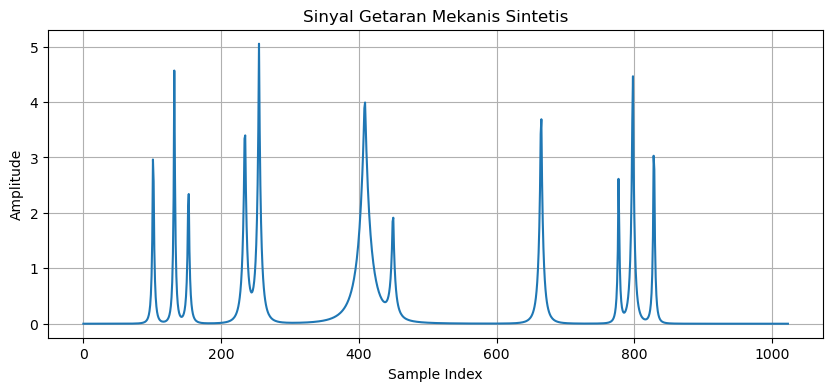

In [61]:
import pywt

vibration_signal = pywt.data.demo_signal('Bumps', n=1024)

# Plot sinyal getaran
plt.figure(figsize=(10, 4))
plt.plot(vibration_signal)
plt.title('Sinyal Getaran Mekanis Sintetis')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Analisis Sinyal Getaran Mekanis Sintetis ⚙️

1. **Apa itu Sinyal Getaran Mekanis?**  
    - Sinyal getaran mekanis adalah representasi dari getaran yang dihasilkan oleh mesin atau struktur mekanis.  
    - Sinyal ini sering digunakan untuk menganalisis kondisi mesin, mendeteksi kerusakan, atau memantau performa mekanis.

2. **Kode yang Digunakan**  
    - **`pywt.data.demo_signal('Bumps', n=1024)`**  
      - Fungsi ini menghasilkan sinyal sintetis dengan pola "Bumps" yang sering digunakan untuk pengujian algoritma analisis sinyal.  
      - Parameter `n=1024` menentukan jumlah sampel dalam sinyal.  
    - **`plt.plot(vibration_signal)`**  
      - Fungsi ini digunakan untuk memvisualisasikan sinyal getaran dalam bentuk grafik.  

3. **Bentuk Sinyal**  
    - Sinyal memiliki pola naik-turun yang tidak teratur, mencerminkan karakteristik getaran mekanis.  
    - Pola ini dapat digunakan untuk mendeteksi anomali atau perubahan dalam sistem mekanis.

4. **Sumbu Grafik**  
    - **Sumbu X (Sample Index):**  
      - Menunjukkan indeks sampel dari sinyal.  
      - Setiap titik pada sumbu ini merepresentasikan waktu relatif dalam pengambilan data.  
    - **Sumbu Y (Amplitude):**  
      - Menunjukkan amplitudo sinyal, yang mencerminkan intensitas getaran pada waktu tertentu.  

5. **Aplikasi**  
    - Sinyal ini dapat digunakan untuk:  
      - Mendeteksi kerusakan pada mesin, seperti bantalan yang aus atau roda gigi yang rusak.  
      - Menganalisis pola getaran untuk memprediksi kegagalan mekanis.  
      - Memantau performa mesin secara real-time.  

6. **Kesimpulan**  
    - Visualisasi sinyal getaran mekanis ini memberikan wawasan tentang pola getaran yang terjadi dalam sistem mekanis.  
    - Dengan menganalisis sinyal ini, kita dapat mendeteksi masalah lebih awal dan mencegah kerusakan yang lebih besar.  



### 🔄 Sampling Rate - Sinyal Analog to Digital
#### 📘 Sampling = Kapan harus menangkap nilai
Sampling adalah proses untuk mengubah sinyal analog menjadi sinyal digital dengan menangkap nilai sinyal pada interval waktu tertentu.

Dibawah ini bakal ada dua contoh sinyal yang akan ditangkap nilainya dengan sampling rates yang berbeda, yakni dengan sampling rate 15 dan 40 Hz, dengan frekuensi sinyal utama sebesar 10 Hz.

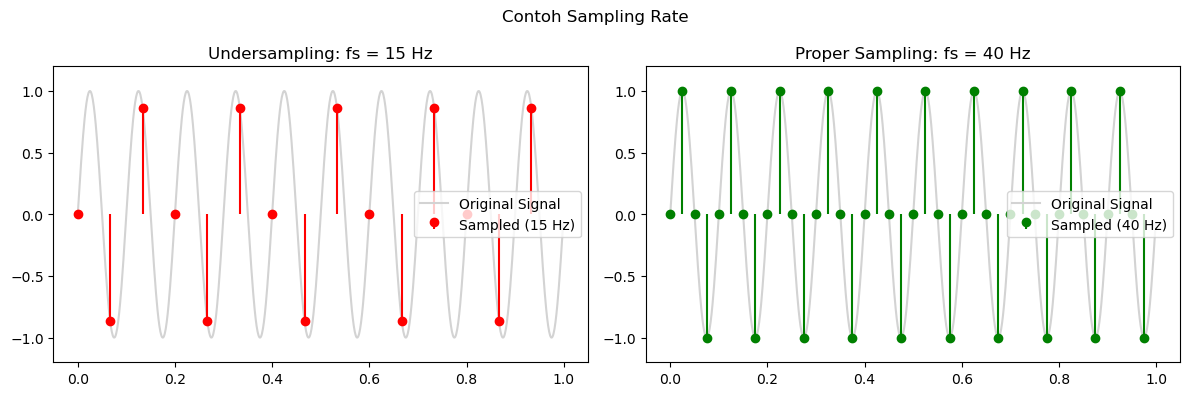

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Sinyal Utama
f_signal = 10  # Frekuensi Sinyal Utama
t_cont = np.linspace(0, 1, 1000, endpoint=False)
x_cont = np.sin(2 * np.pi * f_signal * t_cont)

# Two sampling rates: one below and one above Nyquist rate
fs_low = 15  # Below Nyquist (Nyquist = 2*10 = 20 Hz)
fs_high = 40  # Above Nyquist

def sample_signal(fs, t_max=1):
    t_sampled = np.arange(0, t_max, 1/fs)
    x_sampled = np.sin(2 * np.pi * f_signal * t_sampled)
    return t_sampled, x_sampled

t_low, x_low = sample_signal(fs_low)
t_high, x_high = sample_signal(fs_high)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Undersampling (Aliasing)
axs[0].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[0].stem(t_low, x_low, linefmt='r', markerfmt='ro', basefmt=" ", label='Sampled (15 Hz)')
axs[0].set_title('Undersampling: fs = 15 Hz')
axs[0].legend()
axs[0].set_ylim(-1.2, 1.2)

# Proper sampling (No aliasing)
axs[1].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[1].stem(t_high, x_high, linefmt='g', markerfmt='go', basefmt=" ", label='Sampled (40 Hz)')
axs[1].set_title('Proper Sampling: fs = 40 Hz')
axs[1].legend()
axs[1].set_ylim(-1.2, 1.2)

plt.suptitle("Contoh Sampling Rate")
plt.tight_layout()
plt.show()


### Penjelasan Visualisasi Sampling Rate

1. **Apa itu Sampling Rate?**  
    - Sampling rate adalah jumlah sampel yang diambil per detik dari sinyal analog untuk mengubahnya menjadi sinyal digital.  
    - Semakin tinggi sampling rate, semakin baik sinyal digital merepresentasikan sinyal aslinya.  

2. **Visualisasi yang Ditampilkan**  
    - Grafik pertama menunjukkan **undersampling** (sampling rate rendah, 15 Hz).  
    - Grafik kedua menunjukkan **proper sampling** (sampling rate tinggi, 40 Hz).  

3. **Undersampling (Grafik Kiri)**  
    - Pada grafik ini, sampling rate (15 Hz) lebih rendah dari **Nyquist rate** (2 x frekuensi sinyal = 20 Hz).  
    - Akibatnya, sinyal digital yang dihasilkan tidak merepresentasikan sinyal asli dengan baik.  
    - Fenomena ini disebut **aliasing**, di mana sinyal digital terlihat seperti memiliki frekuensi yang berbeda dari sinyal aslinya.  
    - Contoh: Sinyal asli adalah gelombang sinus 10 Hz, tetapi hasil sampling terlihat seperti gelombang dengan frekuensi lebih rendah.  

4. **Proper Sampling (Grafik Kanan)**  
    - Pada grafik ini, sampling rate (40 Hz) lebih tinggi dari **Nyquist rate**.  
    - Sinyal digital yang dihasilkan merepresentasikan sinyal asli dengan sangat baik.  
    - Tidak ada aliasing, sehingga bentuk gelombang sinus asli tetap terlihat jelas.  

5. **Kesimpulan**  
    - Jika sampling rate terlalu rendah (di bawah Nyquist rate), sinyal digital tidak akan akurat dan dapat menyebabkan aliasing.  
    - Untuk merepresentasikan sinyal dengan baik, sampling rate harus lebih tinggi dari dua kali frekuensi sinyal tertinggi (Nyquist rate).  
    - Visualisasi ini menunjukkan pentingnya memilih sampling rate yang tepat untuk menghindari distorsi pada sinyal digital.


### 🧠 Teorema Sampling Nyquist–Shannon
Berdasakan hasil grafik di atas, bisa dilihat bahwa ketika misalnya dibuat sebuah garis antar titik, sinyal dengan sampling rate 40 Hz akan menghasilkan sinyal yang lebih baik di banding 15 Hz.

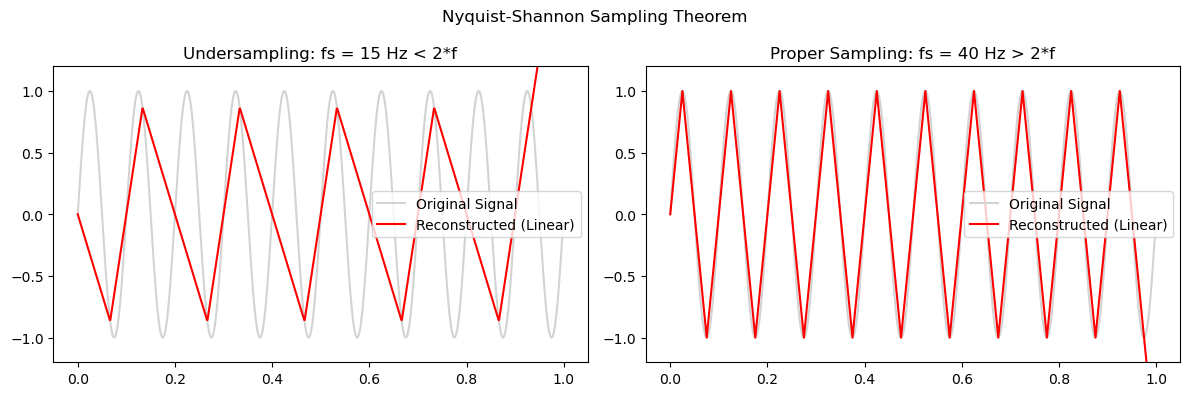

In [64]:
from scipy.interpolate import interp1d

def interpolate_sampled(t_sampled, x_sampled, t_cont):
    """
    Interpolates the sampled signal to match the continuous time vector.
    """
    x_interp = interp1d(t_sampled, x_sampled, kind='linear', fill_value="extrapolate")
    return x_interp(t_cont)

# Interpolate the sampled signals to the continuous time vector
x_low_interp = interpolate_sampled(t_low, x_low, t_cont)
x_high_interp = interpolate_sampled(t_high, x_high, t_cont)

## Plot the Undersampled and Properly Sampled Signals
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Undersampling (Aliasing)
axs[0].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[0].plot(t_cont, x_low_interp, 'r', label='Reconstructed (Linear)')
axs[0].set_title('Undersampling: fs = 15 Hz < 2*f')
axs[0].legend()
axs[0].set_ylim(-1.2, 1.2)

# Proper sampling (No aliasing)
axs[1].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[1].plot(t_cont, x_high_interp, 'r', label='Reconstructed (Linear)')
axs[1].set_title('Proper Sampling: fs = 40 Hz > 2*f')
axs[1].legend()
axs[1].set_ylim(-1.2, 1.2)

plt.suptitle("Nyquist-Shannon Sampling Theorem")
plt.tight_layout()
plt.show()

### Penjelasan Teorema Sampling Nyquist–Shannon

1. **Apa itu Teorema Sampling Nyquist–Shannon?**  
    - Teorema ini menjelaskan bahwa untuk merepresentasikan sinyal analog secara akurat dalam bentuk digital, **frekuensi sampling** harus minimal **dua kali lipat dari frekuensi tertinggi sinyal asli**.  
    - Frekuensi ini disebut **Nyquist rate**. Jika frekuensi sampling lebih rendah dari Nyquist rate, akan terjadi **aliasing**, yaitu distorsi pada sinyal digital.

2. **Apa yang Terjadi pada Visualisasi?**  
    - **Undersampling (fs = 15 Hz)**  
      - Frekuensi sampling lebih rendah dari Nyquist rate (20 Hz).  
      - Hasilnya, sinyal digital tidak menyerupai sinyal asli. Bentuk gelombang menjadi salah dan terlihat seperti memiliki frekuensi yang lebih rendah.  
      - Ini adalah contoh **aliasing**, di mana informasi asli sinyal hilang atau salah interpretasi.  
    - **Proper Sampling (fs = 40 Hz)**  
      - Frekuensi sampling lebih tinggi dari Nyquist rate.  
      - Hasilnya, sinyal digital menyerupai sinyal asli dengan sangat baik. Tidak ada distorsi, dan bentuk gelombang tetap terjaga.

3. **Mengapa Ini Penting?**  
    - Dalam dunia nyata, seperti audio, video, atau komunikasi, jika frekuensi sampling tidak cukup tinggi, kualitas data digital akan buruk.  
    - Contoh: Jika musik direkam dengan sampling rate rendah, suara akan terdengar aneh atau terdistorsi.

4. **Kesimpulan**  
    - Untuk mendapatkan sinyal digital yang akurat, pastikan frekuensi sampling lebih tinggi dari dua kali frekuensi tertinggi sinyal asli.  
    - Jika tidak, informasi penting dari sinyal asli akan hilang, dan hasilnya tidak dapat dipercaya.  
    - Visualisasi ini menunjukkan pentingnya memilih frekuensi sampling yang tepat untuk menghindari aliasing dan menjaga kualitas sinyal.

### ❓ Apa maksud dari Frekuensi maksimum??
Secara sederhana, sinyal yang ada di sekitar kita merupakan gabungan dari beberapa sinyal dengan frekuensi yang berbeda menjadi satu. Kita bisa memecah sinyal tersebut menjadi beberapa bagian untuk mengetahui komponen frekuensi penysun sinyal tersebut.

Disini kita akan menggunakan Fourier Transform (Fungsi untuk mengubah sinyal dari Time domain ke Frequenies domain).

It's fine jika belum tau seputar Fourier transform, kamu bisa melihat tentang overview dari apa itu Fourier transform pada video berikut

⚙️ Misalkan, jika dimiliki sebuah sinyal dengan frekuensi yang berbeda

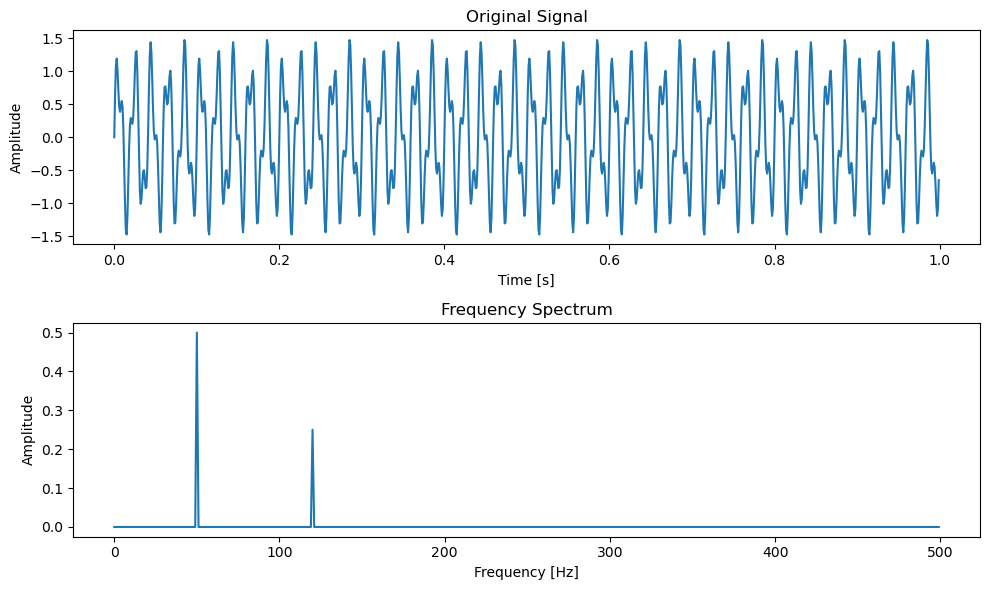

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Simulate a signal (mix of 50 Hz and 120 Hz)
fs = 1000  # original sampling rate
T = 1.0    # duration in seconds
t = np.linspace(0.0, T, int(fs * T), endpoint=False)

## Gabungan dari dua sinyal
x = np.sin(2.0*np.pi*50.0*t) + 0.5*np.sin(2.0*np.pi*120.0*t)

# FFT
N = len(x)
xf = fftfreq(N, 1 / fs)
yf = np.abs(fft(x)) / N  # Normalize

## Plot Signal
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(t, x)
axs[0].set_title("Original Signal")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")

axs[1].plot(xf[:N//2], yf[:N//2])
axs[1].set_title("Frequency Spectrum")
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Amplitude")

fig.tight_layout()

### Penjelasan Visualisasi dan Analisis Sinyal

1. **Grafik Sinyal Asli (Time Domain)**  
    - Grafik pertama menunjukkan sinyal asli dalam domain waktu.  
    - Sinyal ini merupakan gabungan dari dua sinyal sinusoidal dengan frekuensi **50 Hz** dan **120 Hz**.  
    - Amplitudo sinyal terlihat naik-turun secara periodik, mencerminkan pola gelombang sinusoidal.

2. **Spektrum Frekuensi (Frequency Domain)**  
    - Grafik kedua menunjukkan hasil transformasi Fourier dari sinyal asli, yang mengubah sinyal dari domain waktu ke domain frekuensi.  
    - Pada grafik ini, terdapat dua puncak utama:  
        - **Puncak pertama di 50 Hz**: Ini menunjukkan bahwa sinyal memiliki komponen frekuensi 50 Hz.  
        - **Puncak kedua di 120 Hz**: Ini menunjukkan bahwa sinyal juga memiliki komponen frekuensi 120 Hz.  
    - Amplitudo pada setiap puncak mencerminkan kekuatan (intensitas) dari masing-masing frekuensi.

3. **Apa yang Dapat Kita Pelajari?**  
    - Transformasi Fourier membantu kita memahami komponen frekuensi penyusun sinyal.  
    - Dalam kasus ini, sinyal terdiri dari dua frekuensi utama (50 Hz dan 120 Hz), yang terlihat jelas pada spektrum frekuensi.  
    - Tidak ada komponen frekuensi lain yang signifikan, sehingga sinyal ini cukup sederhana dan mudah dianalisis.

4. **Aplikasi**  
    - Analisis seperti ini sering digunakan dalam berbagai bidang, seperti:  
        - **Audio**: Memahami frekuensi suara dalam rekaman.  
        - **Komunikasi**: Menganalisis sinyal radio atau data digital.  
        - **Sains dan Teknik**: Mempelajari pola getaran, sinyal listrik, atau fenomena fisik lainnya.

5. **Kesimpulan**  
    - Sinyal yang divisualisasikan adalah kombinasi dari dua gelombang sinusoidal dengan frekuensi 50 Hz dan 120 Hz.  
    - Transformasi Fourier memungkinkan kita untuk memisahkan komponen frekuensi ini, memberikan wawasan tentang struktur sinyal.  
    - Visualisasi ini menunjukkan bagaimana sinyal dapat dianalisis secara mendalam menggunakan domain frekuensi.



### 📘 Resampling, Downsampling, Upsampling
Misalkan Kita punya sinyal respirasi dengan:
frekuensi sampling 20 Hz (Artinya ada 20 nilai dalam satu detik)
Total elemen (total sampel) dari sinyal ini adalah 400 sampel
Kita mempunya dua opsi

Menambah frekuensi sampling (menambah titik nilai diantara titik yang sudah ada, benefit sinyal semakin jelas, namun menambah proses komputasi dan ukuran sinyal)
Mengurangi frekuensi sampling (mengurangi nilai pada sinyal, membuat sinyal semakin pendek, namun proses komputasi yang lebih cepat)

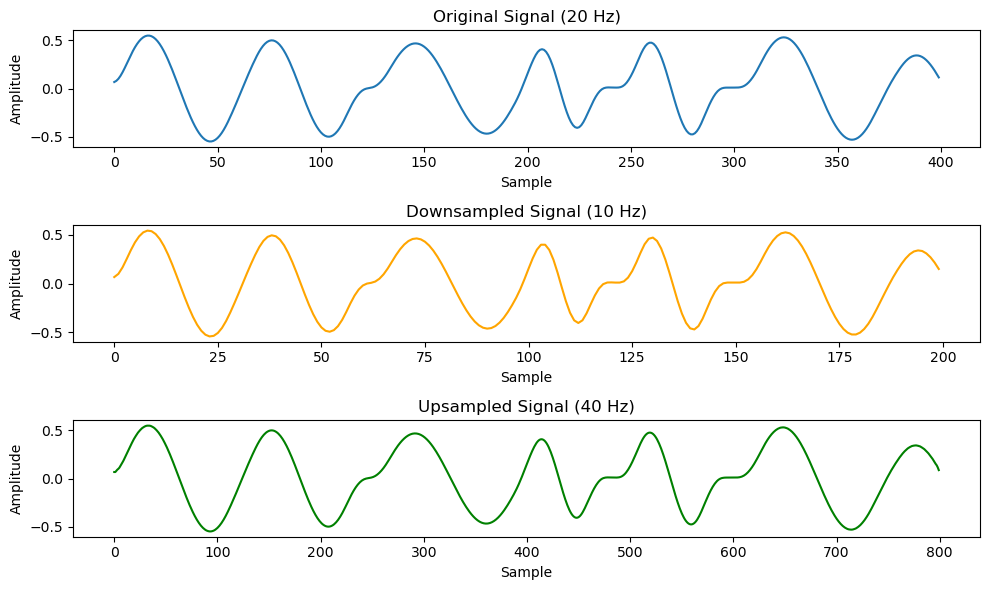

In [2]:
from scipy.signal import decimate, resample
import neurokit2 as nk
import matplotlib.pyplot as plt

# Sinyal asli
fs = 20 ## Sampling rate 20 Hz
time = 20 ## 20 detik
resp_signal = nk.rsp_simulate(duration=time, sampling_rate=fs, respiratory_rate=20, noise=0.01, random_state=2024)

# Upsampling
resp_upsampling = resample(resp_signal, 2*len(resp_signal))  # 20 Hz → 40 Hz (dua kali lipat)

# Downsampling
resp_downsampling = decimate(resp_signal, 2)  # 20 Hz → 10 Hz

## Plot original and downsampled signals
fig, axs = plt.subplots(3, 1, figsize=(10, 6))

axs[0].plot(resp_signal, label='Original Signal')
axs[0].set_title("Original Signal (20 Hz)")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")

axs[1].plot(resp_downsampling, label='Downsampled Signal (10 Hz)', color='orange')
axs[1].set_title("Downsampled Signal (10 Hz)")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")

axs[2].plot(resp_upsampling, label='Upsampled Signal (40 Hz)', color='green')
axs[2].set_title("Upsampled Signal (40 Hz)")
axs[2].set_xlabel("Sample")
axs[2].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

### Penjelasan Visualisasi Resampling (Upsampling dan Downsampling)

1. **Apa itu Resampling?**  
    - Resampling adalah proses mengubah jumlah sampel dalam sinyal digital.  
    - **Upsampling**: Menambah jumlah sampel dengan menambahkan titik-titik baru di antara sampel yang sudah ada.  
    - **Downsampling**: Mengurangi jumlah sampel dengan membuang beberapa titik sampel.

2. **Visualisasi yang Ditampilkan**  
    - **Grafik 1 (Original Signal - 20 Hz)**  
      - Ini adalah sinyal asli dengan frekuensi sampling 20 Hz.  
      - Sinyal terlihat halus dan memiliki pola naik-turun yang berulang, mencerminkan siklus pernapasan.  
    - **Grafik 2 (Downsampled Signal - 10 Hz)**  
      - Sinyal ini dihasilkan dengan mengurangi frekuensi sampling menjadi 10 Hz.  
      - Beberapa titik sampel dibuang, sehingga sinyal menjadi lebih kasar dan kurang detail dibandingkan sinyal asli.  
      - Namun, pola utama sinyal masih terlihat.  
    - **Grafik 3 (Upsampled Signal - 40 Hz)**  
      - Sinyal ini dihasilkan dengan menambah frekuensi sampling menjadi 40 Hz.  
      - Titik-titik baru ditambahkan di antara sampel asli, sehingga sinyal terlihat lebih halus.  
      - Proses ini meningkatkan resolusi sinyal, tetapi tidak menambah informasi baru.

3. **Apa yang Terjadi pada Sinyal?**  
    - **Downsampling**:  
      - Mengurangi jumlah sampel membuat sinyal lebih pendek dan lebih cepat diproses.  
      - Namun, jika terlalu banyak sampel yang dibuang, detail penting dari sinyal bisa hilang.  
    - **Upsampling**:  
      - Menambah jumlah sampel membuat sinyal terlihat lebih halus.  
      - Namun, ini hanya menambah titik interpolasi tanpa menambah informasi baru.  

4. **Kapan Resampling Digunakan?**  
    - **Downsampling**:  
      - Digunakan untuk mengurangi ukuran data dan mempercepat proses komputasi.  
      - Contoh: Mengolah sinyal dengan resolusi lebih rendah untuk perangkat dengan kapasitas terbatas.  
    - **Upsampling**:  
      - Digunakan untuk meningkatkan resolusi sinyal agar lebih mudah dianalisis atau divisualisasikan.  
      - Contoh: Menampilkan sinyal dengan detail lebih tinggi untuk keperluan presentasi.

5. **Kesimpulan**  
    - Resampling adalah teknik penting dalam pengolahan sinyal untuk menyesuaikan jumlah sampel sesuai kebutuhan.  
    - Downsampling mengurangi ukuran data tetapi dapat menghilangkan detail, sedangkan upsampling meningkatkan resolusi tetapi tidak menambah informasi baru.  
    - Visualisasi ini membantu memahami bagaimana resampling memengaruhi bentuk dan detail sinyal.
  Bisa dilihat bahwa secara tidak langsung, menambah / mengurangi sampling rate dari sebuah sinyal akan mempengaruhi jumlah sampel dari sinyal itu sendiri

#### Question ❓
Apa yang bakal terjadi jika kamu melakukan downsampling secara extreme (misal dari 20 Hz ke 2 Hz), tulis analisis kamu.

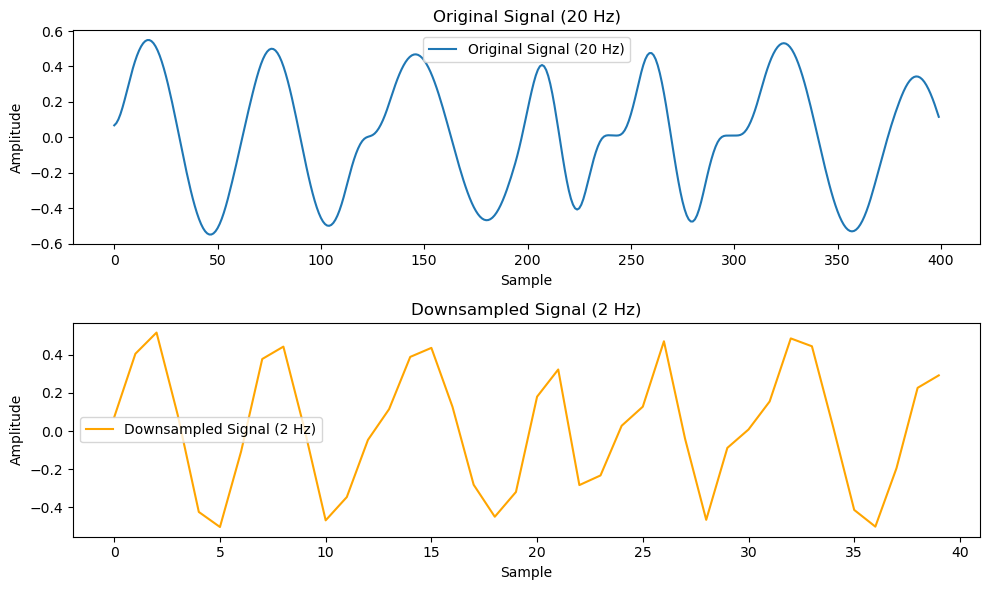

In [4]:
# Downsampling dari 20 Hz ke 2 Hz
resp_downsampling_2hz = decimate(resp_signal, 10)  # Faktor pengurangan 10 (20 Hz → 2 Hz)

# Visualisasi
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Sinyal asli
axs[0].plot(resp_signal, label='Original Signal (20 Hz)')
axs[0].set_title("Original Signal (20 Hz)")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")
axs[0].legend()

# Sinyal setelah downsampling
axs[1].plot(resp_downsampling_2hz, label='Downsampled Signal (2 Hz)', color='orange')
axs[1].set_title("Downsampled Signal (2 Hz)")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")
axs[1].legend()

plt.tight_layout()
plt.show()


### Analisis Downsampling dari 20 Hz ke 2 Hz

1. **Apa itu Downsampling?**  
    - Downsampling adalah proses mengurangi jumlah sampel dalam sinyal digital. Dalam kasus ini, frekuensi sampling dikurangi dari **20 Hz** menjadi **2 Hz**.  
    - Artinya, hanya 1 dari setiap 10 sampel yang dipertahankan, sementara sisanya dibuang.

2. **Visualisasi yang Ditampilkan**  
    - **Grafik 1 (Original Signal - 20 Hz)**  
      - Sinyal asli dengan frekuensi sampling 20 Hz terlihat halus dan detail.  
      - Pola naik-turun yang berulang mencerminkan siklus pernapasan dengan baik.  
    - **Grafik 2 (Downsampled Signal - 2 Hz)**  
      - Sinyal setelah downsampling menjadi jauh lebih kasar dan kehilangan banyak detail.  
      - Pola utama masih terlihat, tetapi bentuk gelombang menjadi tidak akurat.

3. **Apa yang Terjadi pada Sinyal?**  
    - Ketika frekuensi sampling dikurangi secara drastis, banyak informasi penting dari sinyal asli yang hilang.  
    - Sinyal yang dihasilkan menjadi kurang representatif terhadap sinyal asli.  
    - Dalam kasus ini, pola siklus pernapasan masih terlihat, tetapi bentuknya tidak lagi menyerupai sinyal asli.

4. **Kesimpulan**  
    - Downsampling yang terlalu ekstrem, seperti dari 20 Hz ke 2 Hz, dapat menyebabkan hilangnya detail penting dalam sinyal.  
    - Meskipun pola utama masih terlihat, sinyal menjadi kurang akurat dan tidak cocok untuk analisis yang membutuhkan presisi tinggi.  
    - Oleh karena itu, penting untuk memilih tingkat downsampling yang sesuai agar sinyal tetap representatif tanpa kehilangan terlalu banyak informasi.


### Filtering 🎚️
Filter digital membantu memilih atau menghapus komponen frekuensi tertentu dari sinyal.
Ada 3 jenis filter yang umum digunakan

(Lowpass) Melewatkan frekuensi rendah, blok tinggi
(Highpass) Melewatkan frekuensi tinggi, blok rendah
(Bandpass) Melewatkan rentang tertentu saja
Misalnya, kita punya dua buah sinyal yang digabungkan

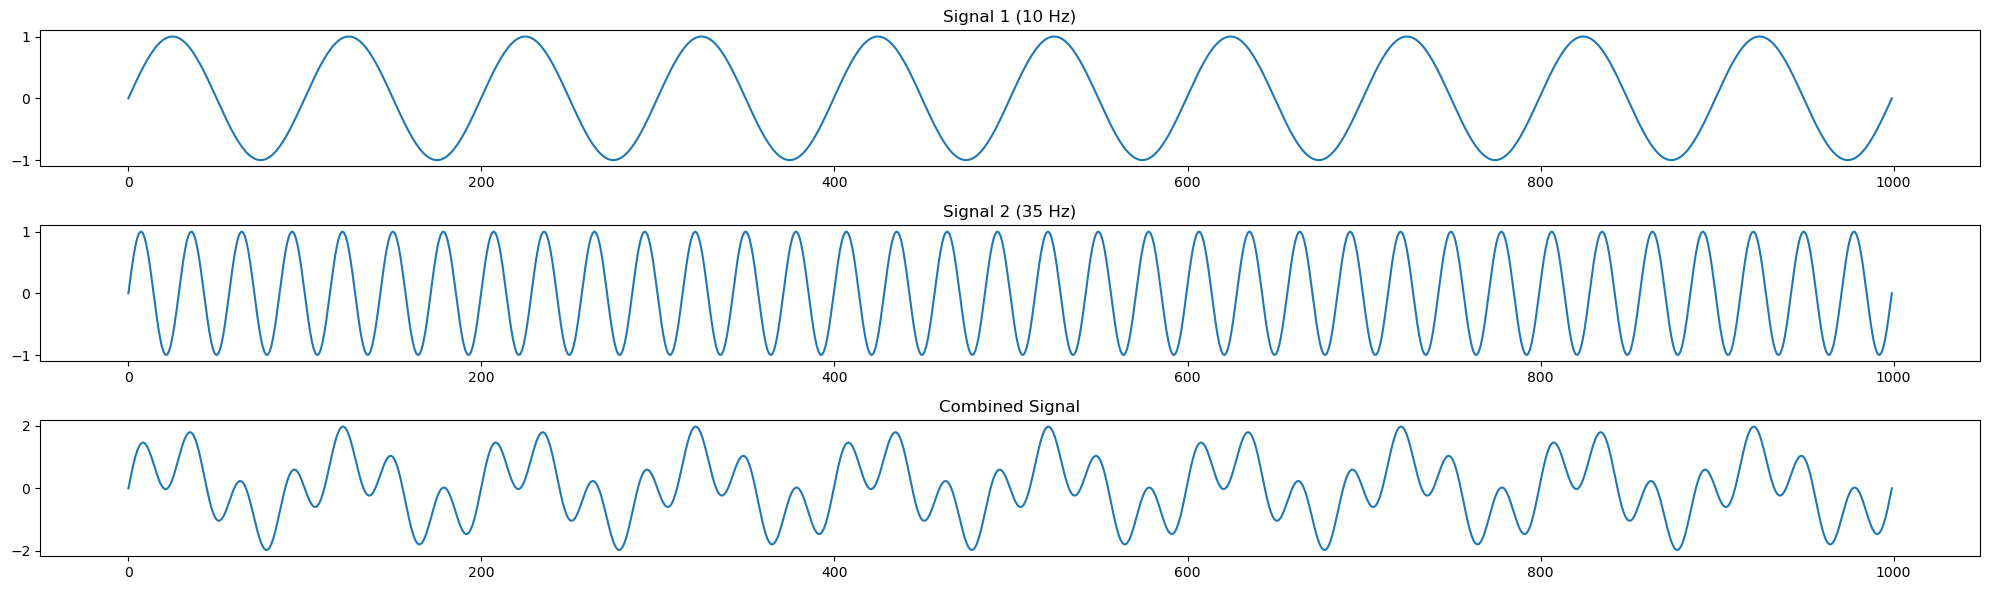

In [6]:
import numpy as np
fs = 1000
time_axis = np.linspace(0, 1, fs)

signal_1 = np.sin(2 * np.pi * 10 * time_axis)
signal_2 = np.sin(2 * np.pi * 35 * time_axis)
signal_combine = signal_1 + signal_2

fig, ax = plt.subplots(3, 1, figsize=(20, 6))
ax[0].plot(signal_1)
ax[0].set_title("Signal 1 (10 Hz)")
ax[1].plot(signal_2)
ax[1].set_title("Signal 2 (35 Hz)")
ax[2].plot(signal_combine)
ax[2].set_title("Combined Signal")
plt.tight_layout()
plt.show()

### Analisis Filtering 🎚️

1. **Apa itu Filtering?**  
    - Filtering adalah proses untuk memilih atau menghapus komponen frekuensi tertentu dari sinyal.  
    - Terdapat tiga jenis filter utama:  
        - **Lowpass Filter**: Melewatkan frekuensi rendah dan memblokir frekuensi tinggi.  
        - **Highpass Filter**: Melewatkan frekuensi tinggi dan memblokir frekuensi rendah.  
        - **Bandpass Filter**: Melewatkan frekuensi dalam rentang tertentu dan memblokir frekuensi di luar rentang tersebut.

2. **Visualisasi Sinyal**  
    - **Signal 1 (10 Hz)**:  
        - Sinyal ini memiliki frekuensi rendah (10 Hz).  
        - Gelombang terlihat halus dan memiliki periode yang panjang.  
    - **Signal 2 (35 Hz)**:  
        - Sinyal ini memiliki frekuensi lebih tinggi (35 Hz).  
        - Gelombang terlihat lebih rapat dengan periode yang lebih pendek.  
    - **Combined Signal**:  
        - Gabungan dari kedua sinyal (10 Hz dan 35 Hz).  
        - Gelombang terlihat lebih kompleks karena merupakan superposisi dari dua sinyal dengan frekuensi berbeda.

3. **Analisis Filtering Berdasarkan Visualisasi**  
    - **Lowpass Filter**:  
        - Jika diterapkan pada sinyal gabungan, hanya komponen frekuensi rendah (10 Hz) yang akan dilewatkan.  
        - Hasilnya, sinyal yang dihasilkan akan menyerupai Signal 1, dengan gelombang halus dan periode panjang.  
    - **Highpass Filter**:  
        - Jika diterapkan pada sinyal gabungan, hanya komponen frekuensi tinggi (35 Hz) yang akan dilewatkan.  
        - Hasilnya, sinyal yang dihasilkan akan menyerupai Signal 2, dengan gelombang rapat dan periode pendek.  
    - **Bandpass Filter**:  
        - Jika diterapkan pada sinyal gabungan dengan rentang tertentu (misalnya 20-40 Hz), hanya komponen frekuensi dalam rentang tersebut yang akan dilewatkan.  
        - Hasilnya, sinyal yang dihasilkan akan menghilangkan komponen 10 Hz dan mempertahankan komponen 35 Hz.

4. **Aplikasi Filtering**  
    - **Lowpass Filter**:  
        - Digunakan untuk menghilangkan noise frekuensi tinggi dari sinyal, seperti dalam pemrosesan audio atau sinyal fisiologis.  
    - **Highpass Filter**:  
        - Digunakan untuk menghilangkan komponen frekuensi rendah, seperti menghilangkan drift DC dalam sinyal elektronik.  
    - **Bandpass Filter**:  
        - Digunakan untuk mengekstrak komponen frekuensi tertentu, seperti dalam komunikasi radio untuk menangkap sinyal dalam rentang frekuensi tertentu.

5. **Kesimpulan**  
    - Filtering adalah teknik penting dalam pengolahan sinyal untuk memisahkan atau menghilangkan komponen frekuensi tertentu.  
    - Berdasarkan visualisasi, kita dapat memahami bagaimana filter memengaruhi sinyal gabungan dengan memilih komponen frekuensi tertentu.  
    - Dengan menggunakan filter yang sesuai, kita dapat meningkatkan kualitas sinyal atau mengekstrak informasi penting dari sinyal.

## Bagaimana kalau ada dua buah sinyal yang kita ingin buang?
Dimana, informasi yang kita butuhkan, dihimpit oleh dua buah sinyal yang tidak kita butuhkan.
Pertama-tama, mari kita buat sinyal-sinyalnya

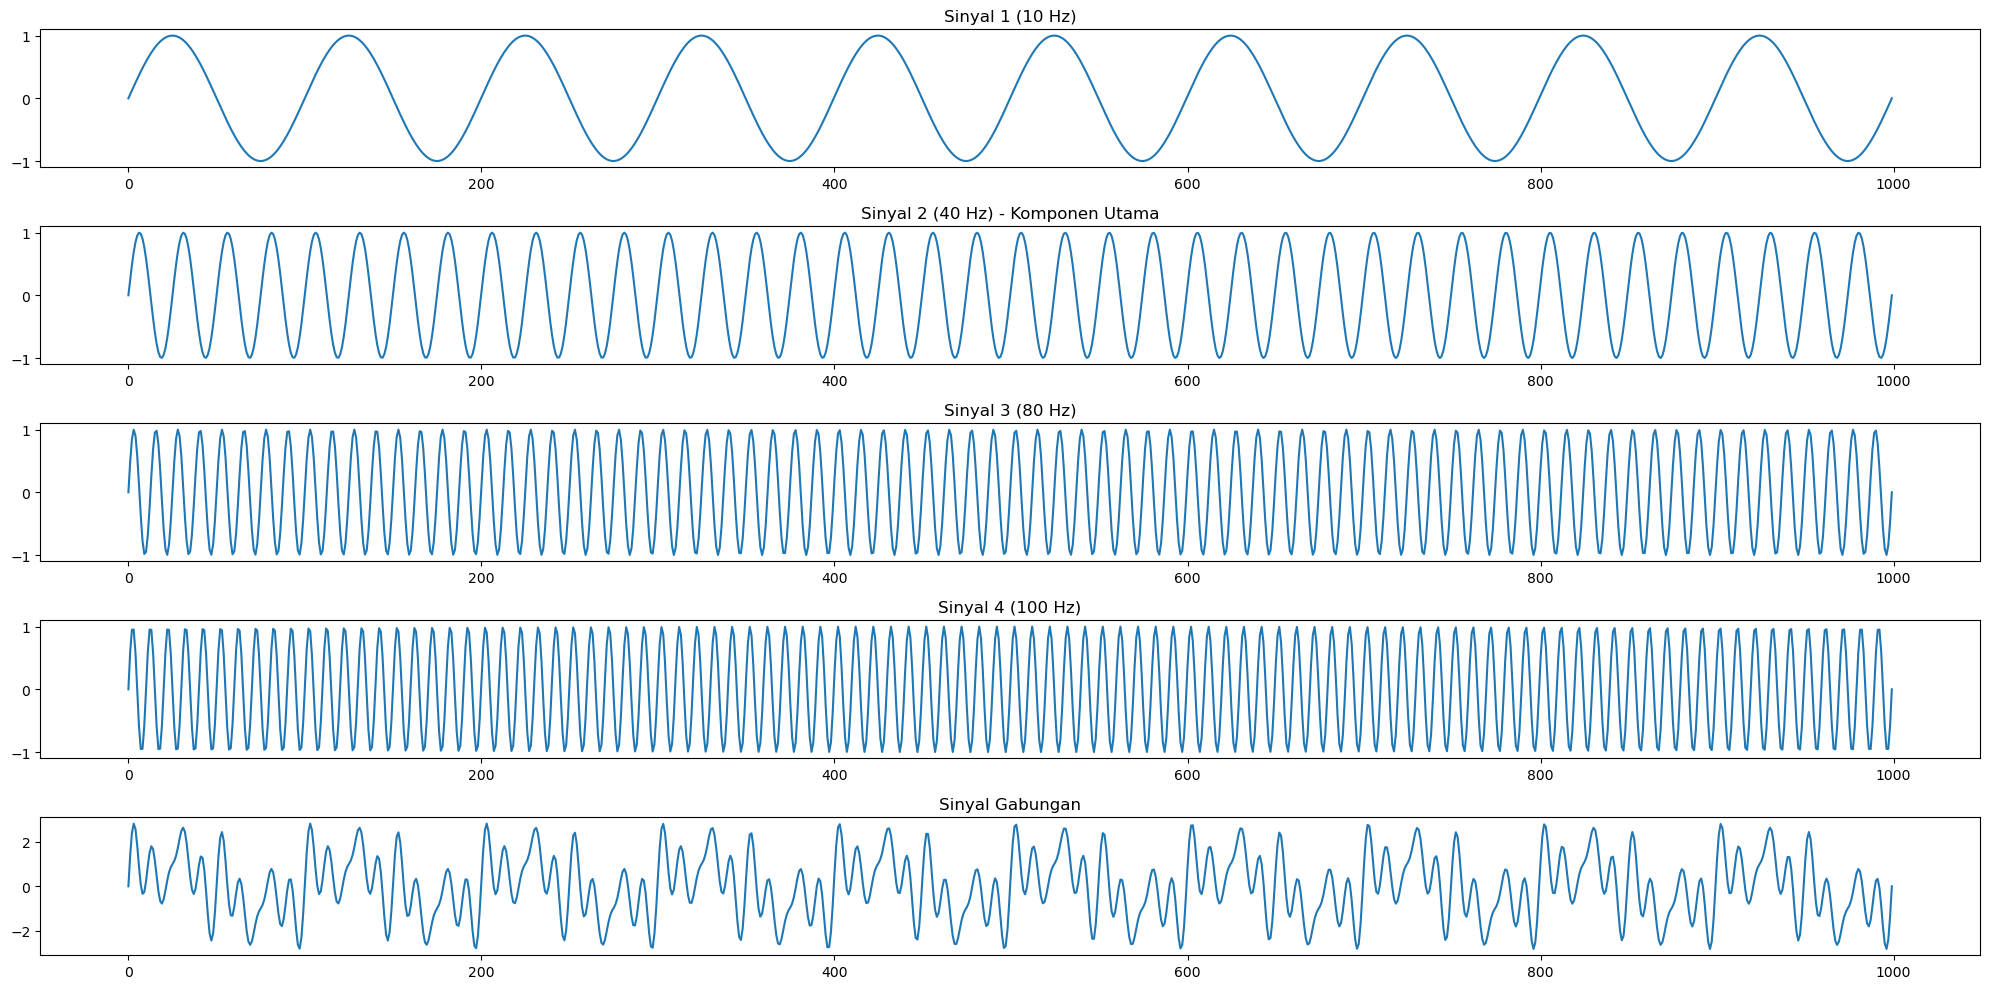

In [7]:
fs = 1000
time_axis = np.linspace(0, 1, fs)

sinyal_1 = np.sin(2 * np.pi * 10 * time_axis) # 10 Hz
sinyal_2 = np.sin(2 * np.pi * 40 * time_axis) # 40 Hz
sinyal_3 = np.sin(2 * np.pi * 80 * time_axis) # 80 Hz
sinyal_4 = np.sin(2 * np.pi * 100 * time_axis) # 100 Hz
sinyal_gabungan = sinyal_1 + sinyal_2 + sinyal_3 + sinyal_4

fig, ax = plt.subplots(5, 1, figsize=(20, 10))
ax[0].plot(sinyal_1)
ax[0].set_title("Sinyal 1 (10 Hz)")
ax[1].plot(sinyal_2)
ax[1].set_title("Sinyal 2 (40 Hz) - Komponen Utama")
ax[2].plot(sinyal_3)
ax[2].set_title("Sinyal 3 (80 Hz)")
ax[3].plot(sinyal_4)
ax[3].set_title("Sinyal 4 (100 Hz)")
ax[4].plot(sinyal_gabungan)
ax[4].set_title("Sinyal Gabungan")
plt.tight_layout()
plt.show()

#### Melakukan Bandpass (Menghilangkan frekuensi rendah dan tinggi)
Maka kita akan lakukan bandpass di cutoff 27 dan 50 Hz untuk mengambil sinyal yang kita butuhkan (40 Hz)

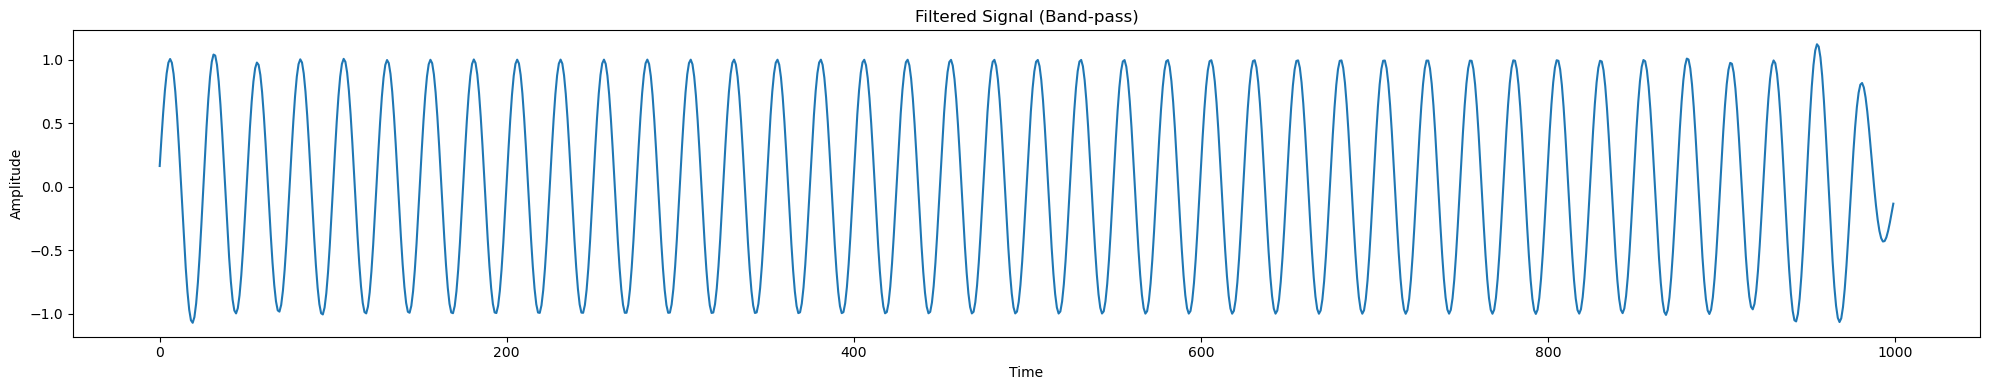

In [9]:
from scipy import signal

cutoff_low = 27 # Frekuensi cutoff dalam Hz
cutoff_high = 50 # Frekuensi cutoff dalam Hz
order = 3 # Orde filter

b, a = signal.butter(order, [cutoff_low, cutoff_high], fs=fs, btype='band', analog=False)
signal_filt_band = signal.filtfilt(b, a, sinyal_gabungan)

plt.figure(figsize=(20, 4))
plt.plot(signal_filt_band)
plt.title("Filtered Signal (Band-pass)")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

### Analisis dan Penjelasan dalam Bahasa Sederhana

1. **Masalah yang Dihadapi**  
    Kita memiliki **sinyal gabungan** yang terdiri dari beberapa frekuensi:  
    - **10 Hz** (frekuensi rendah)  
    - **40 Hz** (frekuensi utama yang kita butuhkan)  
    - **80 Hz** (frekuensi tinggi)  
    - **100 Hz** (frekuensi sangat tinggi)  

    Tujuan kita adalah **mengambil hanya frekuensi 40 Hz** dan **menghilangkan frekuensi lainnya** (10 Hz, 80 Hz, dan 100 Hz).

---

2. **Langkah Pertama: Membuat Sinyal Gabungan**  
    - Kita membuat empat sinyal dengan frekuensi berbeda (10 Hz, 40 Hz, 80 Hz, dan 100 Hz).  
    - Kemudian, kita menjumlahkan semua sinyal tersebut menjadi satu **sinyal gabungan**.  
    - **Visualisasi**:  
      - Setiap sinyal individu divisualisasikan untuk menunjukkan bentuk gelombangnya.  
      - Sinyal gabungan terlihat lebih kompleks karena merupakan campuran dari semua sinyal.

---

3. **Langkah Kedua: Menggunakan Bandpass Filter**  
    - **Apa itu Bandpass Filter?**  
      Bandpass filter adalah alat yang hanya **melewatkan frekuensi dalam rentang tertentu** dan **menghapus frekuensi di luar rentang tersebut**.  
      - Dalam kasus ini, kita menggunakan bandpass filter dengan **cutoff 27 Hz hingga 50 Hz**.  
      - Artinya, hanya frekuensi antara 27 Hz dan 50 Hz yang akan dilewatkan, sementara frekuensi lainnya akan dihapus.

    - **Mengapa Rentang 27-50 Hz?**  
      Karena frekuensi utama yang kita butuhkan adalah **40 Hz**, dan rentang ini cukup untuk menangkap frekuensi tersebut tanpa menyertakan frekuensi lain (10 Hz, 80 Hz, dan 100 Hz).

---

4. **Hasil Filtering**  
    - Setelah menerapkan bandpass filter, sinyal yang dihasilkan hanya mengandung **frekuensi 40 Hz**.  
    - Frekuensi lainnya (10 Hz, 80 Hz, dan 100 Hz) telah dihapus.  
    - **Visualisasi**:  
      - Sinyal hasil filtering terlihat lebih sederhana dan menyerupai sinyal asli dengan frekuensi 40 Hz.  
      - Ini menunjukkan bahwa bandpass filter berhasil menghapus frekuensi yang tidak diinginkan.

---

5. **Kesimpulan**  
    - Dengan menggunakan bandpass filter, kita dapat **mengisolasi frekuensi tertentu** dari sinyal gabungan.  
    - Teknik ini sangat berguna dalam berbagai aplikasi, seperti:  
      - **Audio**: Menghapus noise atau suara yang tidak diinginkan.  
      - **Sains**: Menganalisis komponen frekuensi tertentu dari sinyal kompleks.  
      - **Komunikasi**: Menangkap sinyal dalam rentang frekuensi tertentu.  
    - Dalam kasus ini, kita berhasil mengambil frekuensi 40 Hz dan menghilangkan frekuensi lainnya.